<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
loan_intent
EDU         6453
ME

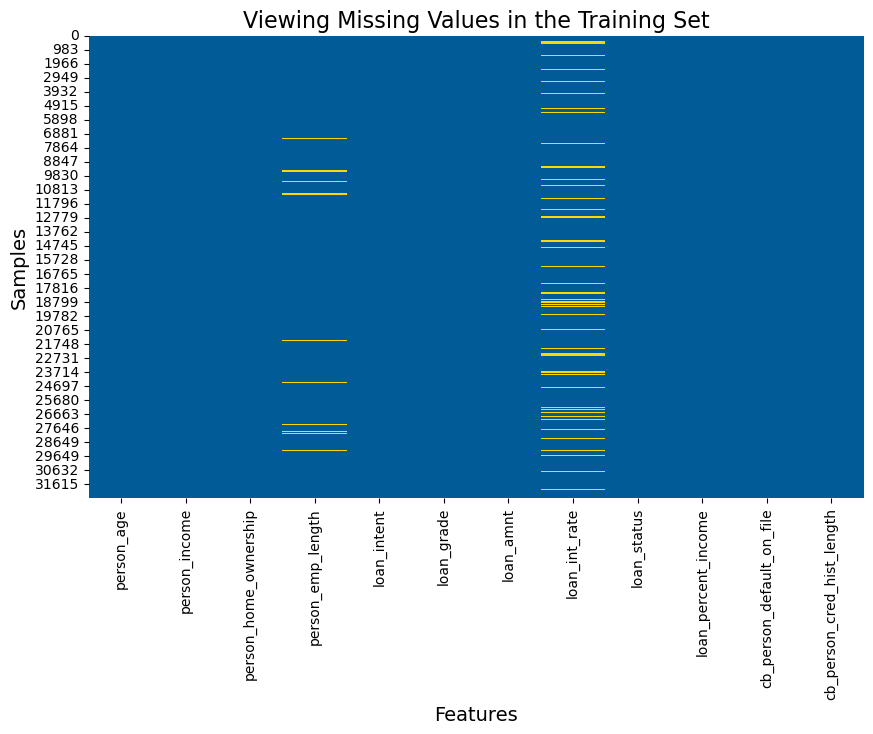

Total number of missing values after deletion: 0


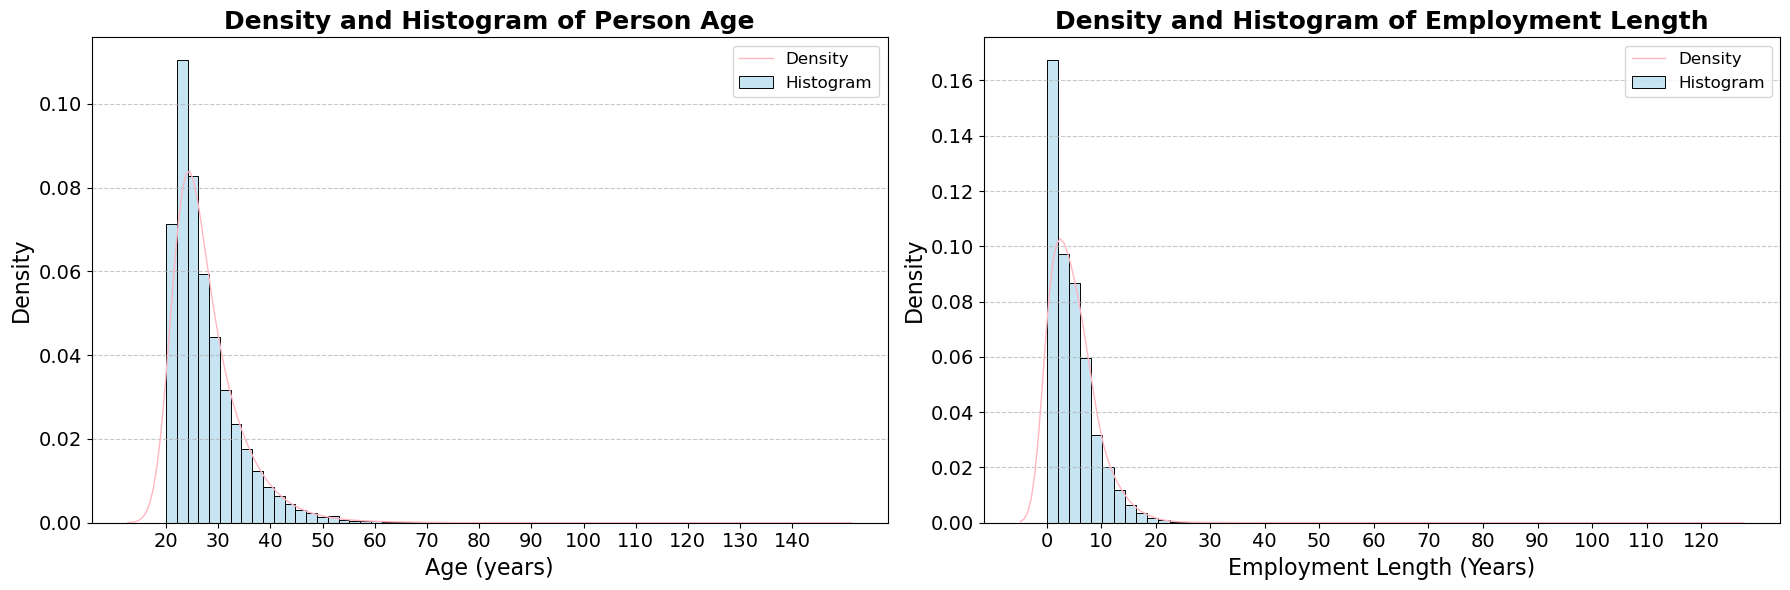

      Person Age        

Number of people above 80 years old before removing outliers: 5
count    28496.000000
mean        27.721119
std          6.168309
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         80.000000
Name: person_age, dtype: float64
There are 0 people with an age between 1 and 18.
There are 15579 people with an age between 19 and 26.
There are 10392 people with an age between 27 and 36.
There are 2051 people with an age between 37 and 46.
There are 371 people with an age between 47 and 56.
There are 87 people with an age between 57 and 66.
There are 14 people with an age between 67 and 76.
There are 2 people with an age between 77 and 86.
Total number of people: 28496



   person_emp_length        

Number of people with employment length greater than 40 years before removing outliers: 3
count    28493.000000
mean         4.780578
std          4.032361
min          0.000000
25%          2.000000
50%          4.000000
75

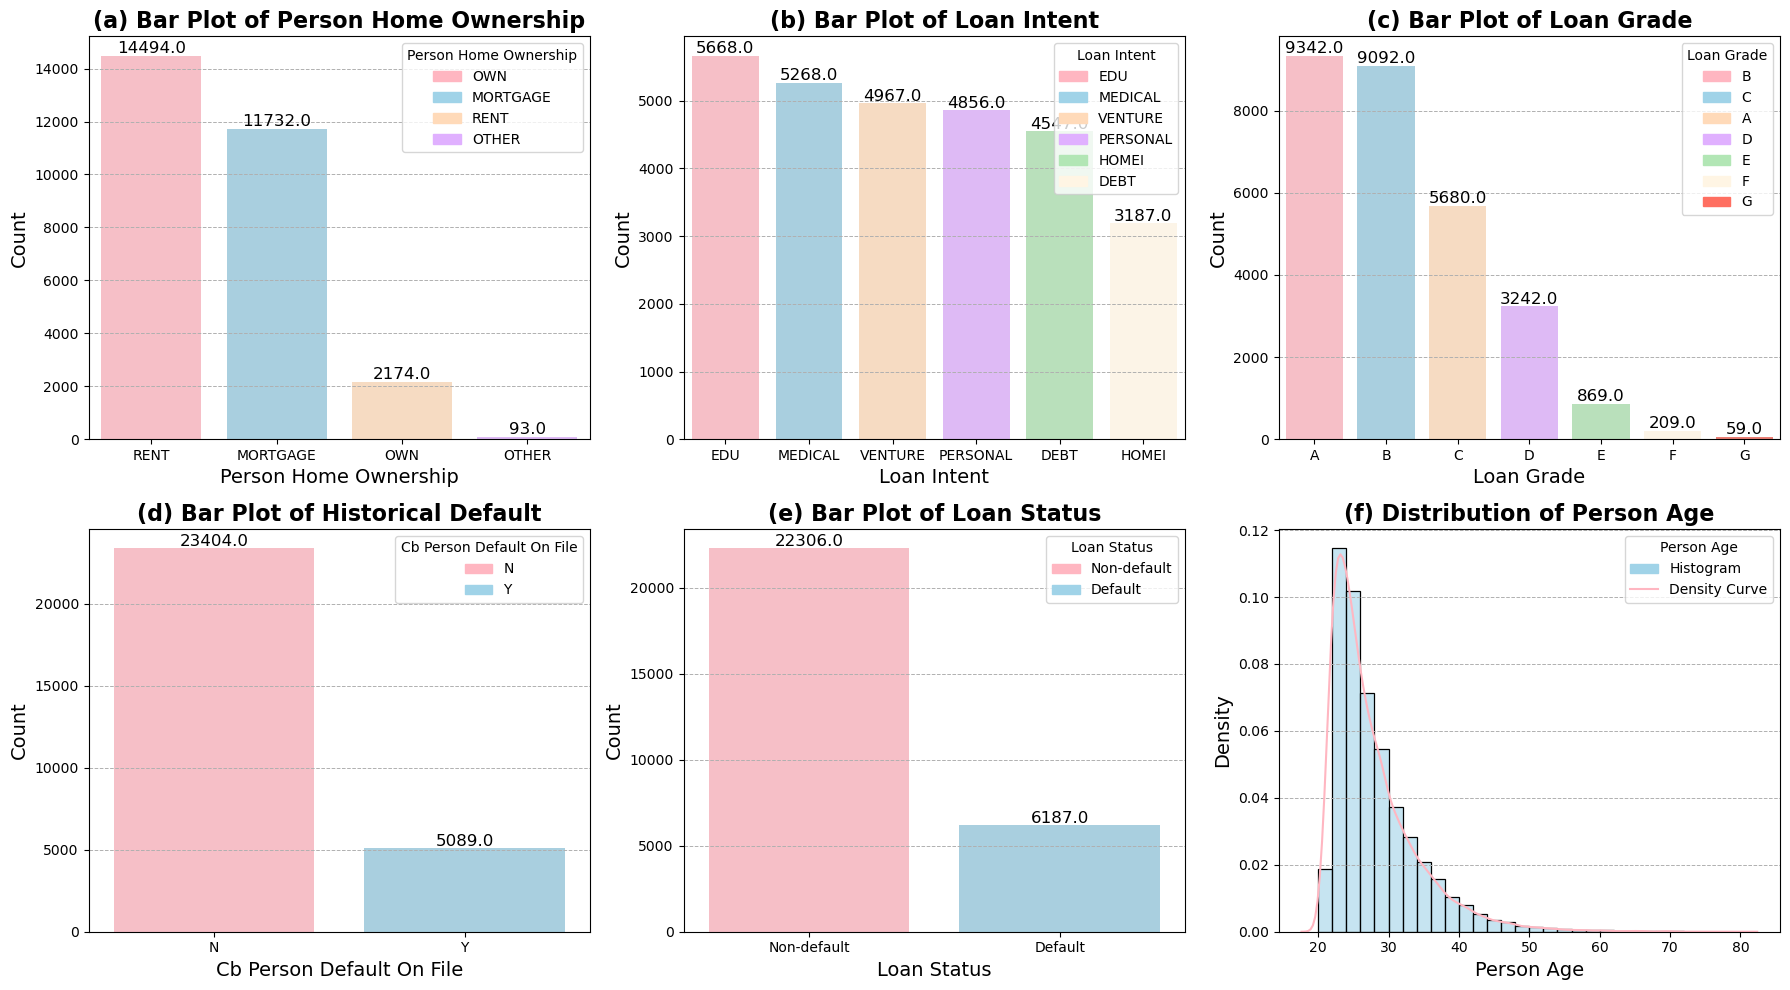

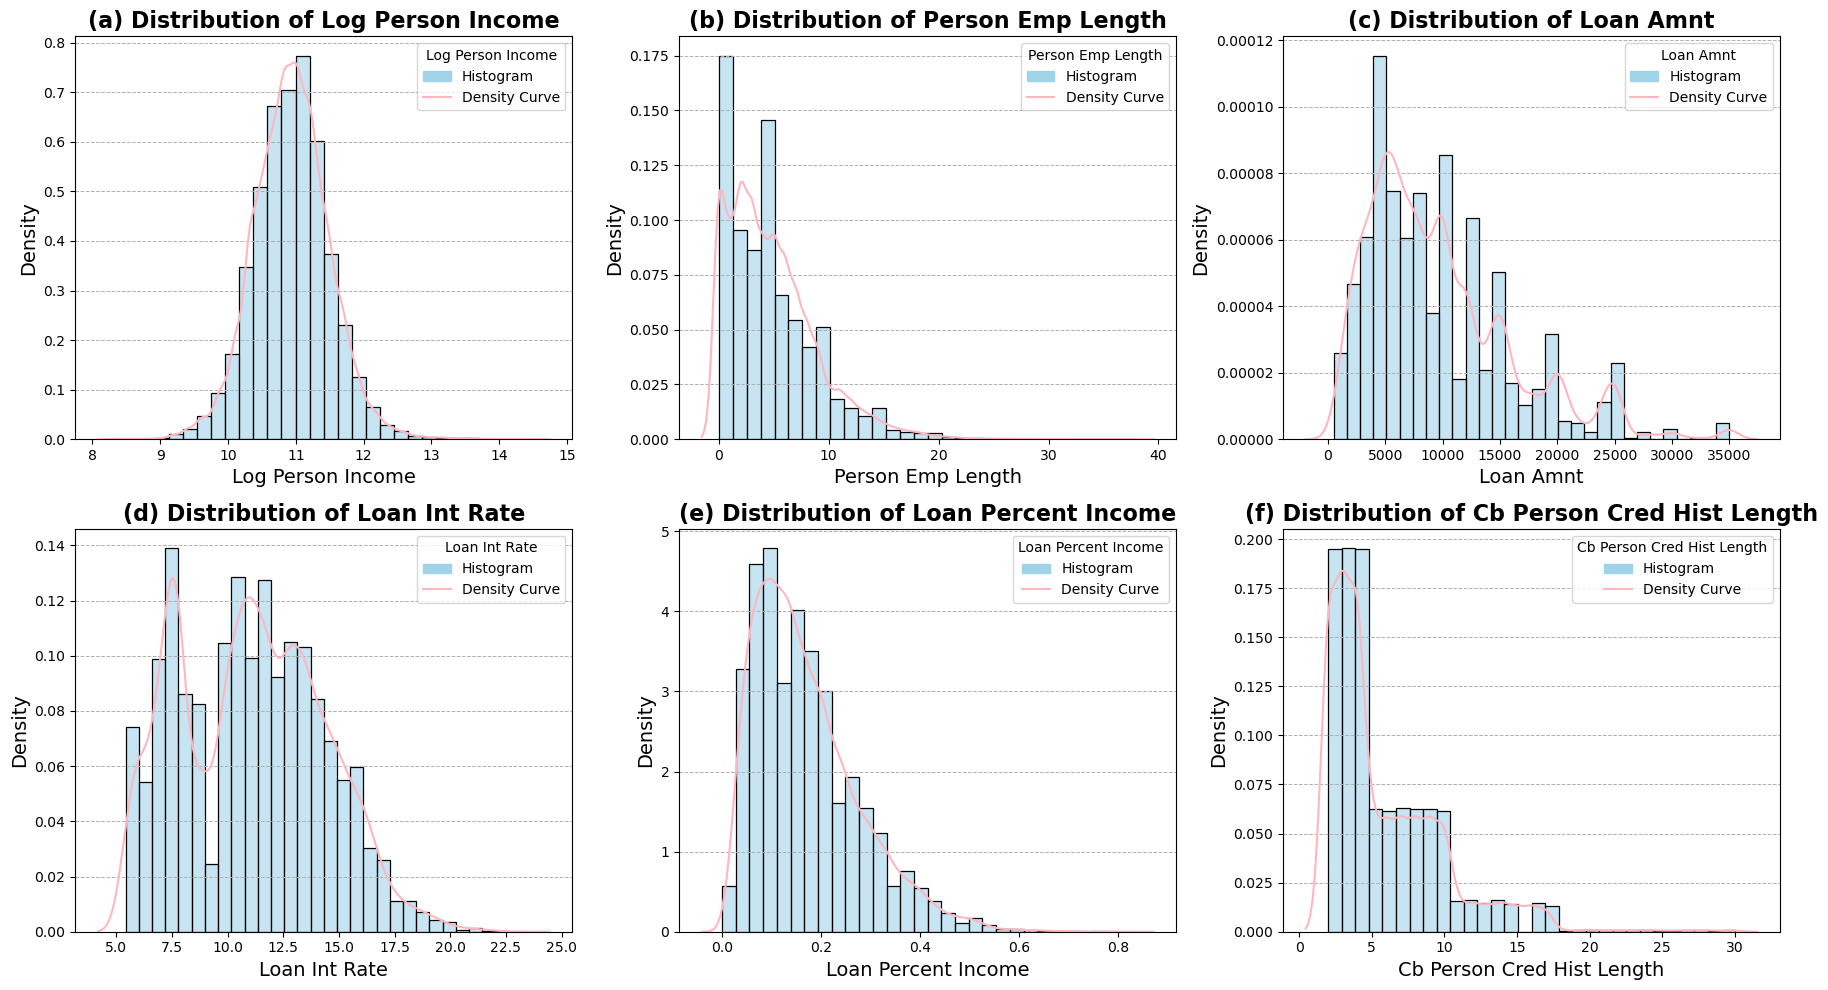


Proportions of loan_status by person_home_ownership:
loan_status           Non-default Default
person_home_ownership                    
RENT                       68.73%  31.27%
MORTGAGE                   87.36%  12.64%
OWN                        93.33%   6.67%
OTHER                      70.97%  29.03%

Proportions of loan_status by loan_intent:
loan_status Non-default Default
loan_intent                    
EDU              82.94%  17.06%
MEDICAL          73.08%  26.92%
VENTURE          85.34%  14.66%
PERSONAL         80.23%  19.77%
DEBT             71.54%  28.46%
HOMEI            74.27%  25.73%

Proportions of loan_status by loan_grade:
loan_status Non-default Default
loan_grade                     
A                90.39%   9.61%
B                84.07%  15.93%
C                79.67%  20.33%
D                40.78%  59.22%
E                35.33%  64.67%
F                30.14%  69.86%
G                 1.69%  98.31%

Proportions of loan_status by cb_person_default_on_file:
loan_

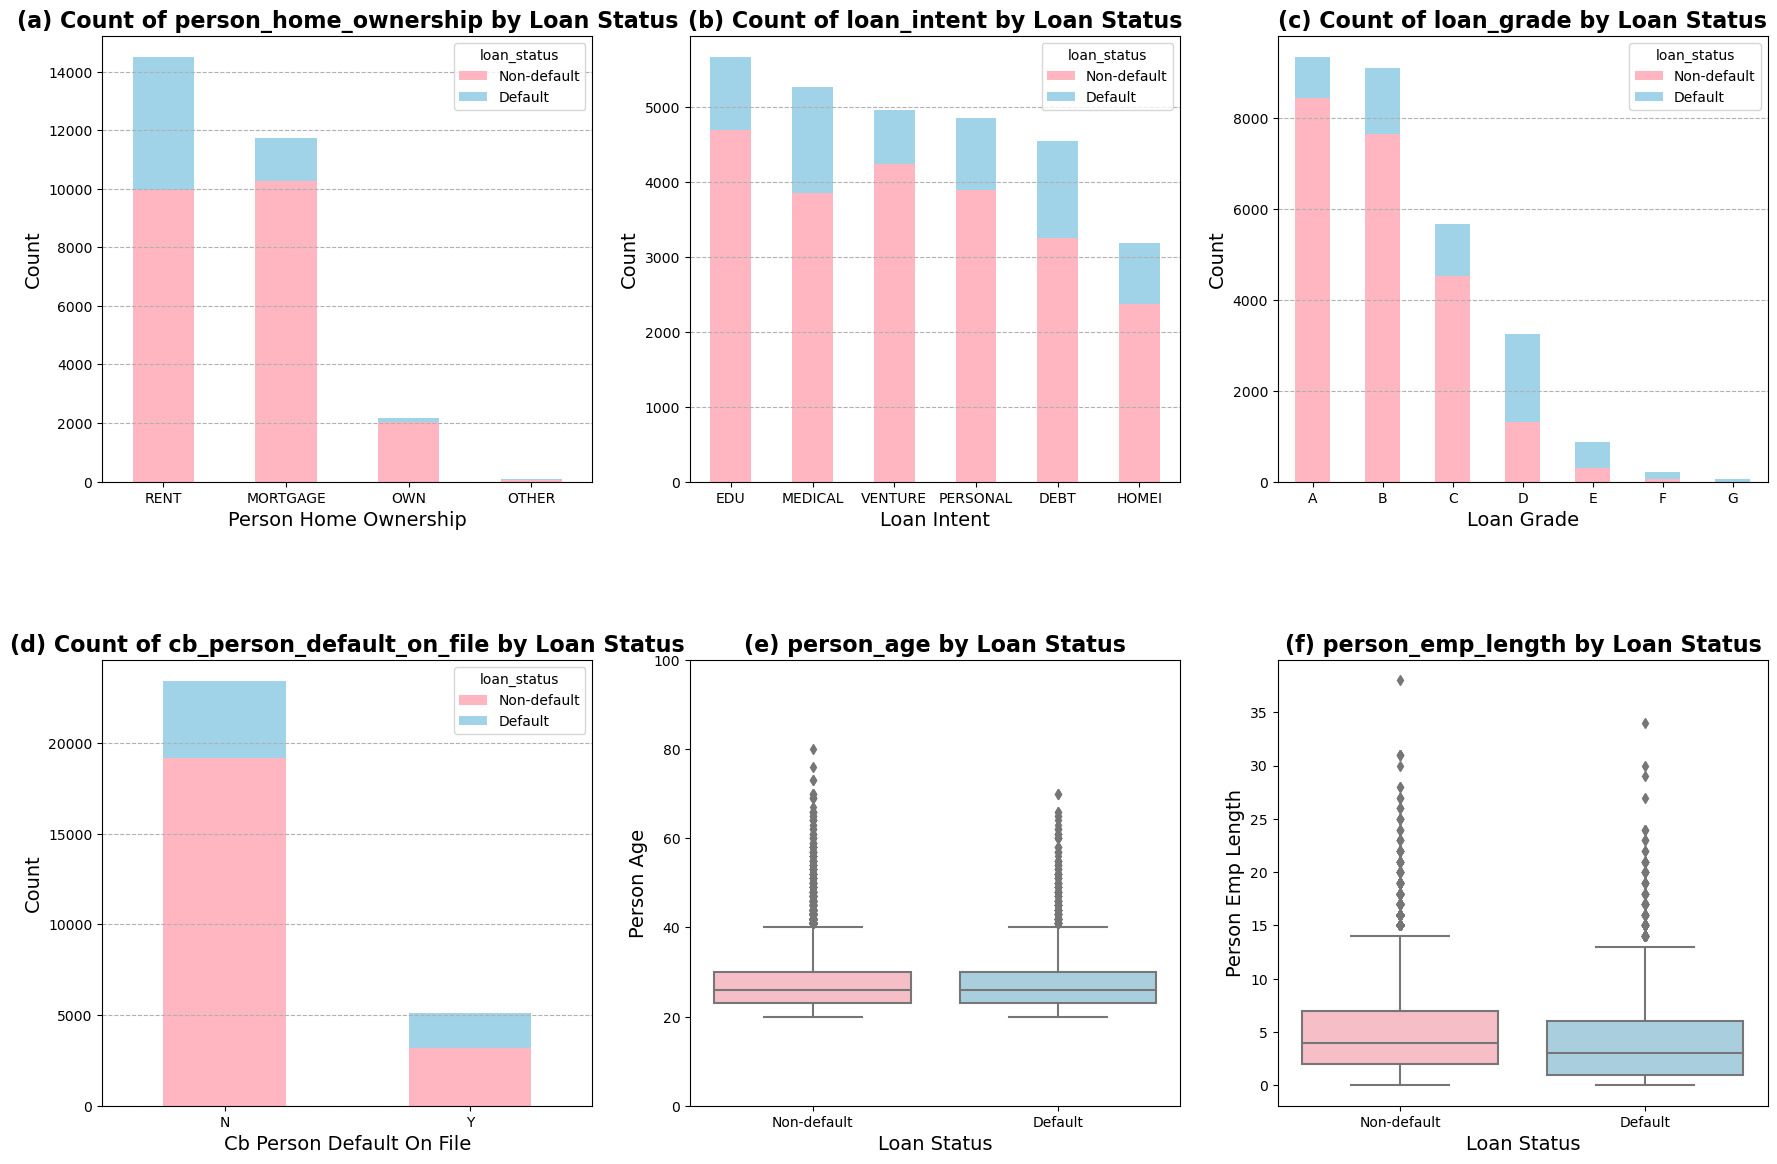

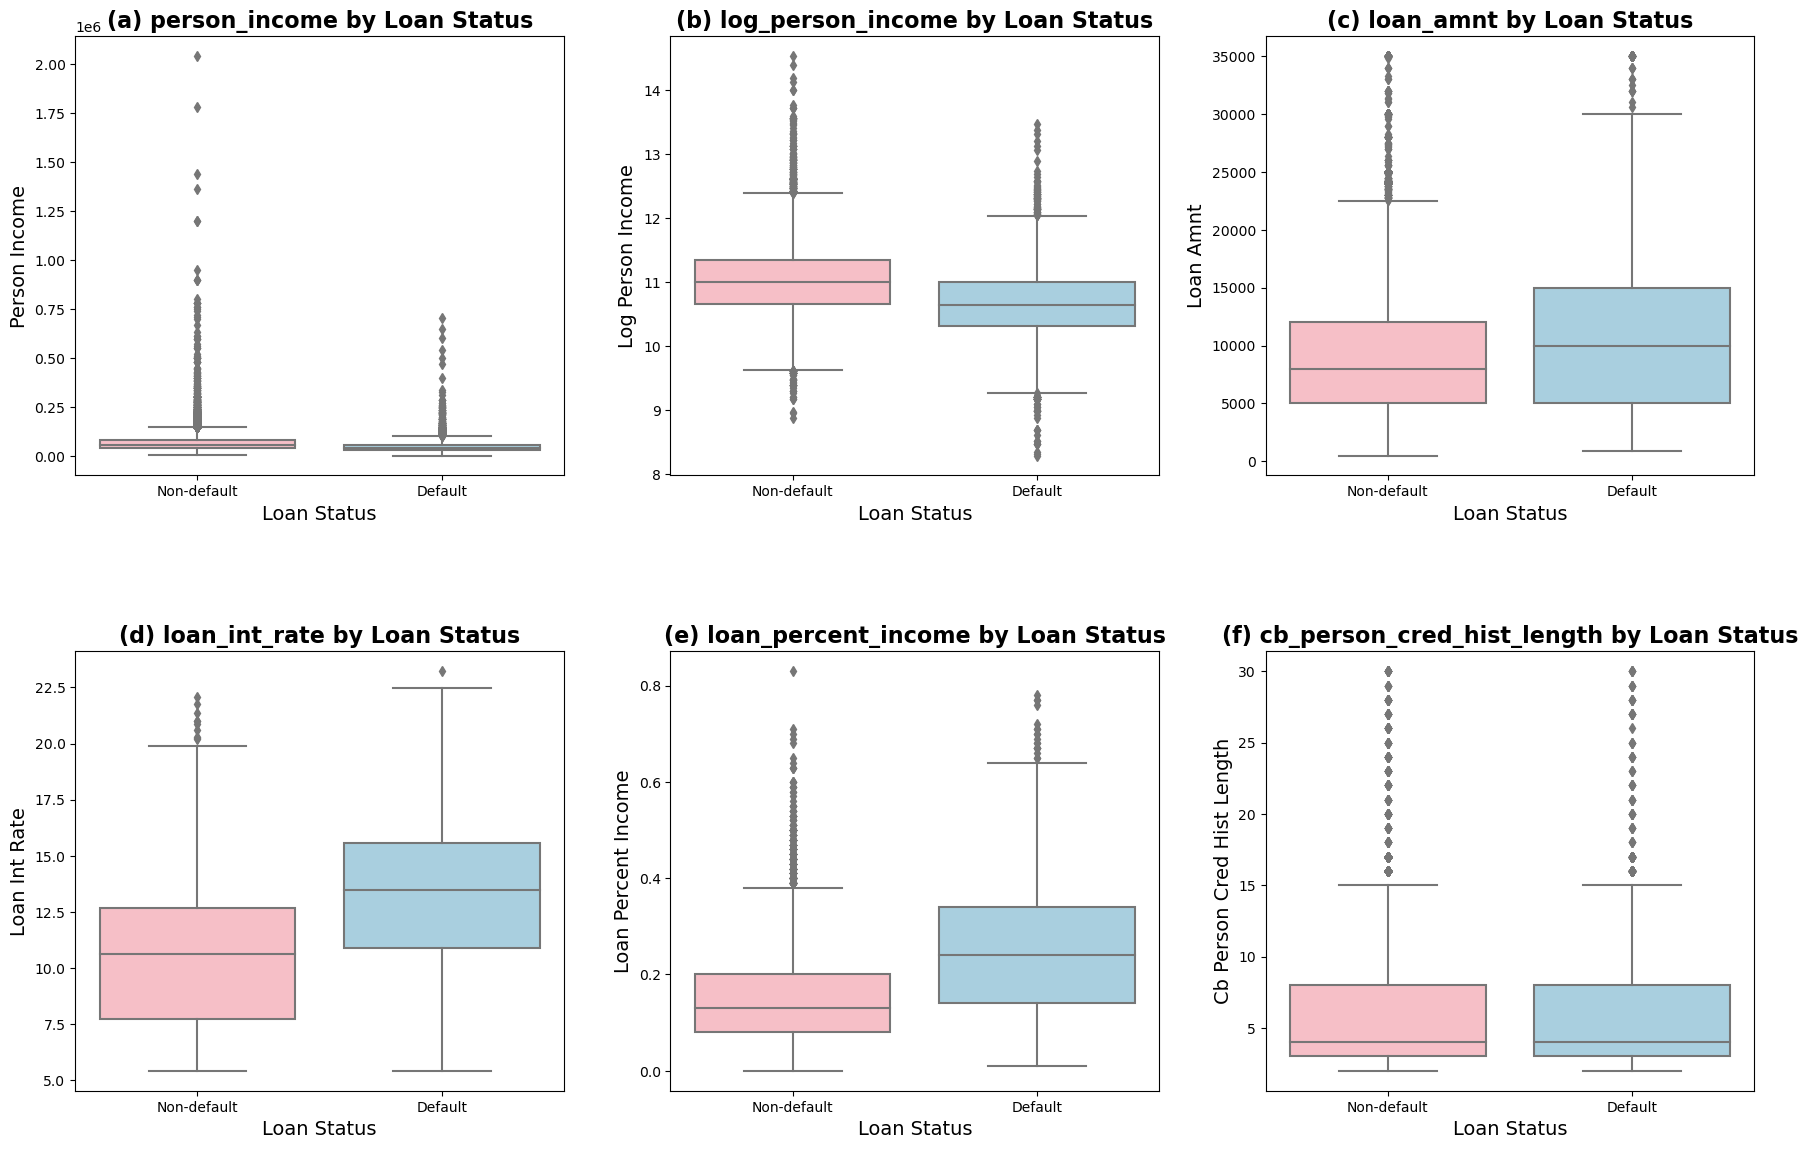

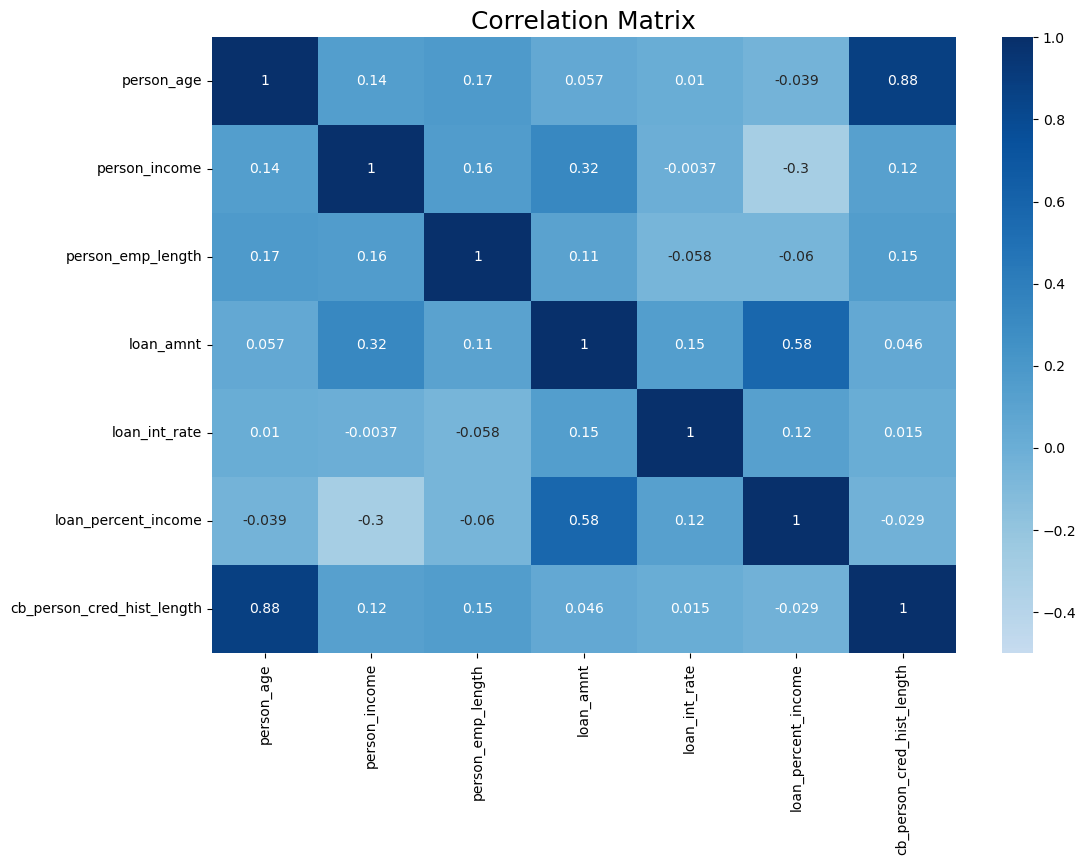

In [5]:
#EDA
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap

credit_dt = pd.read_csv("credit_risk_dataset.csv")

credit_dt.head()
credit_dt.info()
credit_dt.dtypes
credit_dt['loan_status'] = credit_dt['loan_status'].replace({0: 'Non-default', 1: 'Default'})
loan_intent_mapping = {
    'DEBTCONSOLIDATION': 'DEBT',
    'EDUCATION': 'EDU',
    'HOMEIMPROVEMENT': 'HOMEI'
}

credit_dt['loan_intent'] = credit_dt['loan_intent'].replace(loan_intent_mapping)

print(credit_dt['loan_intent'].value_counts())
credit_dt.describe()
num_duplicates = credit_dt.duplicated().sum()
print(f"There are {num_duplicates} duplicated rows.")

credit_dt = credit_dt.drop_duplicates()
missing_values = credit_dt.isna()
total_missing = missing_values.sum().sum()
missing_per_column = credit_dt.isna().sum()

print("Total number of missing values:", total_missing)
print("Number of missing values per column:\n", missing_per_column)

custom_colors = ['#005B96', '#FFD700']  
custom_cmap = LinearSegmentedColormap.from_list('custom_blue_yellow', custom_colors)

plt.figure(figsize=(10, 6))
sns.heatmap(credit_dt.isnull(), cbar=False, cmap=custom_cmap) 

plt.title("Viewing Missing Values in the Training Set", fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Samples', fontsize=14)
plt.savefig('missing_values_heatmap.png', bbox_inches='tight') 
plt.show()

credit_dt = credit_dt.dropna()

total_missing_after = credit_dt.isna().sum().sum()
print("Total number of missing values after deletion:", total_missing_after)
credit_dt.describe()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

variables = ['person_age', 'person_emp_length']
titles = ["Density and Histogram of Person Age", "Density and Histogram of Employment Length"]
x_labels = ["Age (years)", "Employment Length (Years)"]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i, var in enumerate(variables):
    hist = sns.histplot(credit_dt[var], bins=60, stat='density', color="#A0D3E8", alpha=0.6, ax=axes[i], label='Histogram')
    kde = sns.kdeplot(credit_dt[var], color="#FFB6C1", linewidth=1, bw_adjust=3, ax=axes[i], label='Density')
    
    axes[i].set_title(titles[i], fontsize=18, fontweight='bold')
    axes[i].set_xlabel(x_labels[i], fontsize=16)
    axes[i].set_ylabel("Density", fontsize=16)
    
    if var == 'person_age':
        axes[i].set_xticks(np.arange(min(credit_dt[var]), max(credit_dt[var]) + 1, 10))
    else:
        axes[i].set_xticks(range(int(credit_dt[var].min()), int(credit_dt[var].max()) + 1, 10))

    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].xaxis.grid(False)

    axes[i].legend(loc='upper right', fontsize=12)

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('outliers.png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()
print("      Person Age        \n")
age_counts = credit_dt['person_age'].value_counts()
count_above_80 = (age_counts > 80).sum()

num_above_80 = credit_dt[credit_dt['person_age'] > 80].shape[0]
print(f"Number of people above 80 years old before removing outliers: {num_above_80}")

credit_dt = credit_dt[credit_dt['person_age'] <= 80]
print(credit_dt['person_age'].describe())

def age_group(arr):
    for i in range(len(arr) - 1):
        next_age = arr[i] + 1
        num_people = credit_dt[(credit_dt['person_age'] >= next_age) & 
                                (credit_dt['person_age'] <= arr[i + 1])].shape[0]
        print(f"There are {num_people} people with an age between {next_age} and {arr[i + 1]}.")

age_group([0, 18, 26, 36, 46, 56, 66, 76, 86])
print(f"Total number of people: {len(credit_dt)}")
print("\n\n")

print("   person_emp_length        \n")
length_counts = credit_dt['person_emp_length'].value_counts()
count_above_40 = (length_counts > 40).sum()

num_above_40 = credit_dt[credit_dt['person_emp_length'] > 40].shape[0]
print(f"Number of people with employment length greater than 40 years before removing outliers: {num_above_40}")

credit_dt = credit_dt[credit_dt['person_emp_length'] <= 40]
print(credit_dt['person_emp_length'].describe())

def length_group(arr):
    for i in range(len(arr) - 1):
        next_length = arr[i] + 1
        length_count1 = credit_dt[(credit_dt['person_emp_length'] >= next_length) & 
                                   (credit_dt['person_emp_length'] <= arr[i + 1])].shape[0]
        print(f"There are {length_count1} people with an employment length between {next_length} and {arr[i + 1]}.")

length_group([0, 18, 26, 36, 46])
print(f"Total number of people: {len(credit_dt)}")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

palette = {
    'person_home_ownership': ['#FFB6C1', '#A0D3E8', '#FFDAB9', '#E0B0FF'],
    'loan_intent': ["#FFB6C1", "#A0D3E8", "#FFDAB9", "#E0B0FF", "#B2E6B5", "#FFF5E4"],
    'loan_grade': ["#FFB6C1", "#A0D3E8", "#FFDAB9", "#E0B0FF", "#B2E6B5", "#FFF5E4", "#FF6F61"],
    'cb_person_default_on_file': ["#FFB6C1", "#A0D3E8"],
    'loan_status': ["#FFB6C1", "#A0D3E8"],
    'hist_fill': "#A0D3E8",
    'density_line': "#FFB6C1"
}

titles = {
    'person_home_ownership': "Bar Plot of Person Home Ownership",
    'loan_intent': "Bar Plot of Loan Intent",
    'loan_grade': "Bar Plot of Loan Grade",
    'cb_person_default_on_file': "Bar Plot of Historical Default",
    'loan_status': "Bar Plot of Loan Status",
    'person_age': "Density and Histogram of Person Age",
    'log_person_income': "Density and Histogram of Log Person Income",
    'person_emp_length': "Density and Histogram of Employment Length",
    'loan_amnt': "Density and Histogram of Loan Amount",
    'loan_int_rate': "Density and Histogram of Loan Interest Rate",
    'loan_percent_income': "Density and Histogram of Loan Percent of Income",
    'cb_person_cred_hist_length': "Density and Histogram of Credit History Length"
}

columns_to_plot = [
    'person_home_ownership', 'loan_intent', 'loan_grade',
    'cb_person_default_on_file', 'loan_status',
    'person_age', 'log_person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
    'cb_person_cred_hist_length'
]

credit_dt['log_person_income'] = np.log(credit_dt['person_income'] + 1)

for group in range(2):
    fig = plt.figure(figsize=(18, 10))
    gs = GridSpec(2, 3, figure=fig)

    def plot_bar(ax, data, column, label):
        data[column] = pd.Categorical(data[column], categories=data[column].value_counts().index, ordered=True)
        sns.countplot(data=data, x=column, palette=palette[column], ax=ax)
        ax.set_title(f"({label}) {titles[column]}", fontsize=16, fontweight='bold')
        ax.set_xlabel(column.replace('_', ' ').title(), fontsize=14)
        ax.set_ylabel("Count", fontsize=14)

        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')
        ax.grid(axis='y', linestyle='--', linewidth=0.7)
        ax.xaxis.grid(False)

        handles = [plt.Rectangle((0,0),1,1, color=color) for color in palette[column]]
        labels = data[column].unique()
        ax.legend(handles, labels, title=column.replace('_', ' ').title(), loc='upper right', fontsize=10)

    def plot_hist_density(ax, data, variable, label):
        sns.histplot(
            data[variable],
            bins=30,
            fill=True,
            color=palette['hist_fill'],
            alpha=0.6,
            stat='density',
            ax=ax
        )
        sns.kdeplot(
            data[variable],
            color=palette['density_line'],
            linewidth=1.5,
            bw_adjust=1,
            ax=ax
        )
        ax.set_title(f"({label}) Distribution of {variable.replace('_', ' ').title()}", fontsize=16, fontweight='bold')
        ax.set_xlabel(variable.replace('_', ' ').title(), fontsize=14)
        ax.set_ylabel("Density", fontsize=14)
        ax.yaxis.grid(True, linestyle='--', linewidth=0.7)
        ax.xaxis.grid(False)

        handles = [
            plt.Rectangle((0, 0), 1, 1, color=palette['hist_fill'], label='Histogram'),
            plt.Line2D([0], [0], color=palette['density_line'], linewidth=1.5, label='Density Curve')
        ]
        ax.legend(handles=handles, title=variable.replace('_', ' ').title(), loc='upper right', fontsize=10)

    labels = ['a', 'b', 'c', 'd', 'e', 'f']
    for i in range(6):
        column = columns_to_plot[group * 6 + i]
        ax = fig.add_subplot(gs[i // 3, i % 3])
        if column in titles and 'Bar Plot' in titles[column]:
            plot_bar(ax, credit_dt, column, labels[i])
        else:
            plot_hist_density(ax, credit_dt, column, labels[i])

    plt.tight_layout()
    filename = f"Single_Variable{group+1}.png"
    plt.savefig(filename, dpi=300)
    plt.show()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

credit_dt['log_person_income'] = np.log1p(credit_dt['person_income'])

categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
continuous_cols = ['person_age', 'person_emp_length', 'person_income', 'log_person_income', 'loan_amnt',
                   'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(18, 12))

palette = {"Non-default": "#FFB6C1", "Default": "#A0D3E8"}

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    count_data = credit_dt.groupby([col, 'loan_status']).size().unstack().fillna(0)
    count_data.plot(kind='bar', stacked=True, color=palette.values(), ax=plt.gca())
    plt.title(f'({chr(96 + i)}) Count of {col} by Loan Status', fontsize=16, fontweight='bold')
    plt.xlabel(col.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.gca().yaxis.grid(True, linestyle='--')
    plt.gca().xaxis.grid(False)
    plt.xticks(rotation=0)

for i, col in enumerate(continuous_cols[:2], 1):
    plt.subplot(2, 3, i + len(categorical_cols))
    sns.boxplot(x='loan_status', y=col, data=credit_dt, palette=palette)
    plt.title(f'({chr(96 + i + len(categorical_cols))}) {col} by Loan Status', fontsize=16, fontweight='bold')
    plt.xlabel('Loan Status', fontsize=14)
    plt.ylabel(col.replace('_', ' ').title(), fontsize=14)
    plt.grid(False)
    if col == 'person_age':
        plt.ylim(0, 100)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.4)
plt.savefig('group1_count_and_boxplots.png', dpi=300)

plt.figure(figsize=(18, 12))

for i, col in enumerate(continuous_cols[2:], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='loan_status', y=col, data=credit_dt, palette=palette)
    plt.title(f'({chr(96 + i)}) {col} by Loan Status', fontsize=16, fontweight='bold')
    plt.xlabel('Loan Status', fontsize=14)
    plt.ylabel(col.replace('_', ' ').title(), fontsize=14)
    plt.grid(False)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.4)
plt.savefig('group2_boxplots.png', dpi=300)

for col in categorical_cols:
    proportions = credit_dt.groupby([col, 'loan_status']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
    proportions_percentage = proportions.applymap(lambda x: f'{x:.2%}')
    print(f'\nProportions of loan_status by {col}:')
    print(proportions_percentage)
credit_dt.drop(columns=['log_person_income'], inplace=True)
plt.figure(figsize=(12, 8))
numeric_data = credit_dt.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-0.5, vmax=1, center=0)
plt.title('Correlation Matrix', fontsize=18)
plt.savefig('heatmap.png', bbox_inches='tight', dpi=300)
plt.show()
credit_dt.to_csv('final_credit_data.csv', index=False)

In [6]:
#preprocessing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score,f1_score,ConfusionMatrixDisplay
#from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
import shap


data = pd.read_csv('final_credit_data.csv')
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])
data['loan_status'] = 1- data['loan_status']
encoding_mapping = {}
encoding_mapping['loan_status'] = dict(zip(le.classes_, 1-le.transform(le.classes_)))

X_except_status = data[data.columns[~data.columns.isin(['loan_status'])]]
Y = data['loan_status']

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_except_status, Y)
y_resampled = pd.DataFrame(y_resampled,columns = ['loan_status'])
X_resampled = X_resampled.reset_index(drop=True)
y_resampled = y_resampled.reset_index(drop=True)

data_sampled = pd.concat([X_resampled,y_resampled],axis=1)

data_encoded = pd.DataFrame()
factor_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

for column in data_sampled.columns:
    if column in factor_columns:
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_sampled[column])
        encoding_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    else:
        data_encoded[column] = data_sampled[column]

train_indices, test_indices = train_test_split(data_encoded.index, test_size=0.3, random_state=2004)

data_encoded['train.indice'] = False
data_encoded.loc[train_indices, 'train.indice'] = True

data_train = data_encoded[data_encoded["train.indice"] == True]
data_test = data_encoded[data_encoded["train.indice"] == False]

x_train = data_train.drop(['loan_status', 'train.indice'], axis=1)
y_train = data_train['loan_status']

x_test = data_test.drop(['loan_status', 'train.indice'], axis=1)
y_test = data_test['loan_status']

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 8/10; 1/40] START C=0.0001, penalty=l1......................................
[CV 4/10; 1/40] START C=0.0001, penalty=l1......................................
[CV 3/10; 1/40] START C=0.0001, penalty=l1......................................
[CV 6/10; 1/40] START C=0.0001, penalty=l1......................................
[CV 7/10; 1/40] START C=0.0001, penalty=l1......................................
[CV 2/10; 1/40] START C=0.0001, penalty=l1......................................
[CV 8/10; 1/40] END .......C=0.0001, penalty=l1;, score=0.754 total time=   0.0s
[CV 4/10; 1/40] END .......C=0.0001, penalty=l1;, score=0.730 total time=   0.0s
[CV 3/10; 1/40] END .......C=0.0001, penalty=l1;, score=0.643 total time=   0.0s
[CV 6/10; 1/40] END .......C=0.0001, penalty=l1;, score=0.733 total time=   0.0s
[CV 7/10; 1/40] END .......C=0.0001, penalty=l1;, score=0.719 total time=   0.0s
[CV 1/10; 1/40] START C=0.0001, penalty=l1....

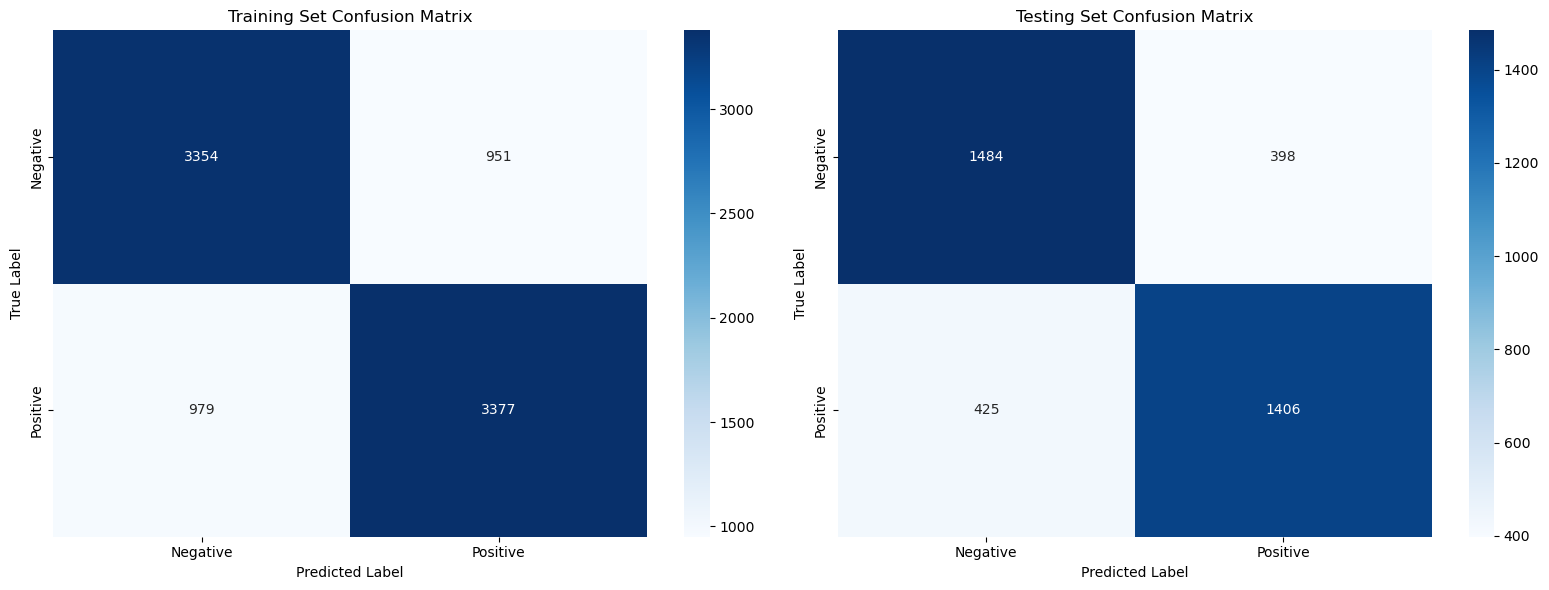

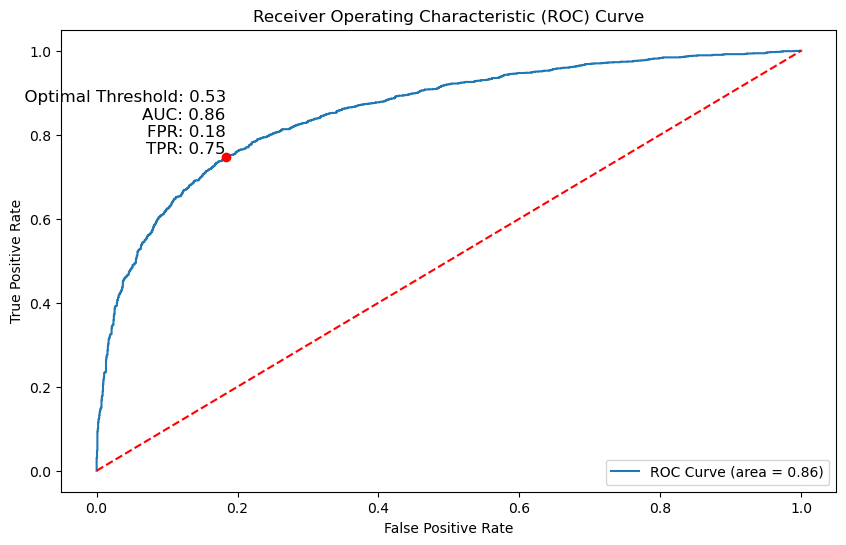


Training Set Metrics:
Accuracy: 77.72%
Precision: 78.03%
Recall: 77.53%
F1 Score: 77.78%
ROC AUC: 77.72%

Testing Set Metrics:
Accuracy: 77.83%
Precision: 77.94%
Recall: 76.79%
F1 Score: 77.36%
ROC AUC: 77.82%
[[[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.1875093  -0.1875093 ]
  ...
  [-0.1962251   0.19622509]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.03092937 -0.03092937]
  ...
  [ 0.05341863 -0.05341863]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.03092937 -0.03092937]
  ...
  [ 0.05341863 -0.05341863]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 ...

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [-0.11211896  0.11211896]
  ...
  [-0.41176414  0.41176413]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [-0.03576208  0.03576

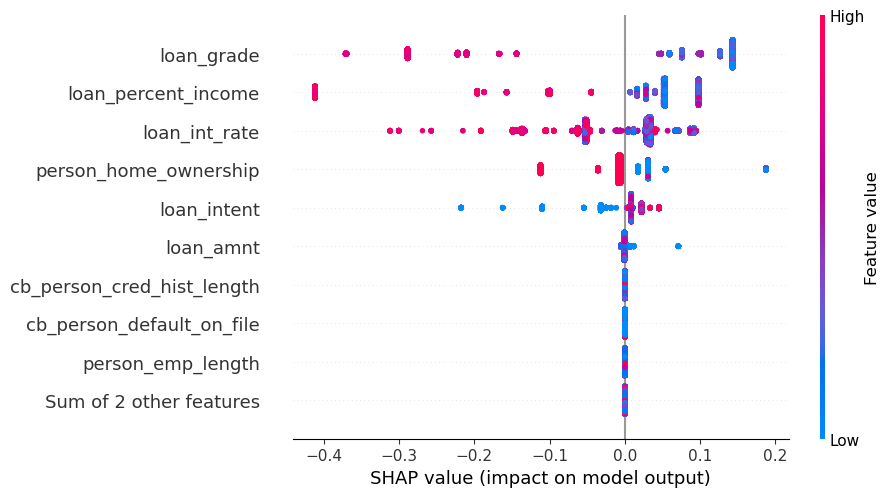

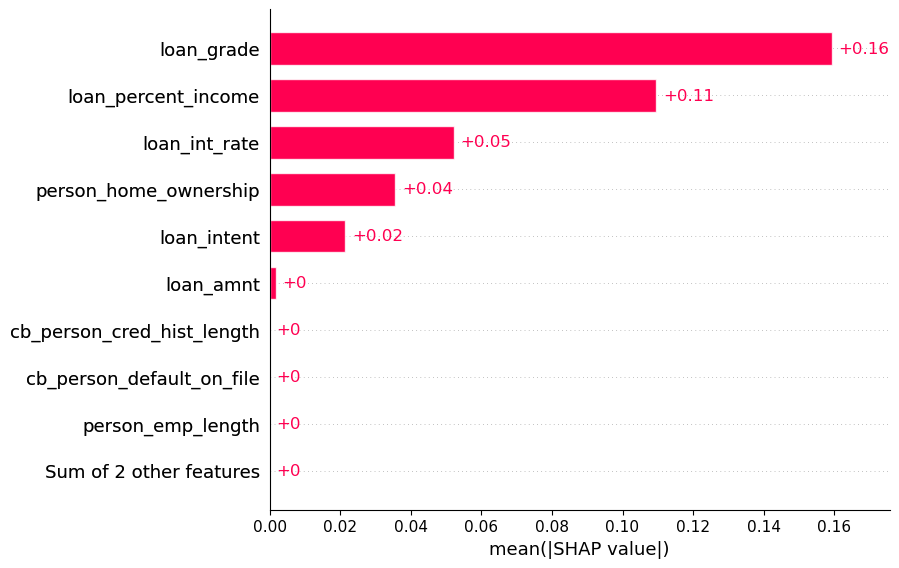

In [7]:
# logistic regression
def my_logistic_regression(x_train, y_train, x_test, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    def calculate_metrics(y_true, y_pred):
        metrics = {
            "Accuracy": f"{accuracy_score(y_true, y_pred) * 100:.2f}%",
            "Precision": f"{precision_score(y_true, y_pred, zero_division=0) * 100:.2f}%",
            "Recall": f"{recall_score(y_true, y_pred) * 100:.2f}%",
            "F1 Score": f"{f1_score(y_true, y_pred) * 100:.2f}%",
            "ROC AUC": f"{roc_auc_score(y_true, y_pred) * 100:.2f}%"
        }
        return metrics

    # Initial logistic regression model
    lr = LogisticRegression(random_state=0, solver='liblinear')

    # Hyperparameters to tune
    lr_param_grid = {
        'C': np.logspace(-4, 4, 20),
        'penalty': ['l1', 'l2']
    }

    # Grid search to find the best hyperparameters
    lr_best = GridSearchCV(lr, param_grid=lr_param_grid, cv=10, scoring="roc_auc", n_jobs=-1, verbose=100)
    lr_best.fit(x_train, y_train)

    # Print the best parameters and the score
    print("Best Estimator: ", lr_best.best_estimator_)
    print("Best Parameters: ", lr_best.best_params_, "  ", "Best Score: ", lr_best.best_score_)

    # Prediction
    y_train_predict = lr_best.predict(x_train)
    y_test_predict = lr_best.predict(x_test)

    # Metrics
    test_metrics = calculate_metrics(y_test, y_test_predict)
    train_metrics = calculate_metrics(y_train, y_train_predict)

    # Output training and testing metrics
    print("\nTraining Set Metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")

    print("\nTesting Set Metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")

    # Confusion Matrix Plotting
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    cm_train = confusion_matrix(y_train, y_train_predict)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'], ax=axs[0])
    axs[0].set_ylabel('True Label')
    axs[0].set_xlabel('Predicted Label')
    axs[0].set_title('Training Set Confusion Matrix')

    cm_test = confusion_matrix(y_test, y_test_predict)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'], ax=axs[1])
    axs[1].set_ylabel('True Label')
    axs[1].set_xlabel('Predicted Label')
    axs[1].set_title('Testing Set Confusion Matrix')

    plt.tight_layout()
    plt.show()

    # ROC Curve Plotting
    y_prob = lr_best.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    optimal_fpr = fpr[optimal_idx]
    optimal_tpr = tpr[optimal_idx]

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.plot(optimal_fpr, optimal_tpr, 'ro')  # Red circle at optimal point
    plt.text(optimal_fpr, optimal_tpr, f'  Optimal Threshold: {optimal_threshold:.2f}\nAUC: {roc_auc:.2f}\nFPR: {optimal_fpr:.2f}\nTPR: {optimal_tpr:.2f}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print("\nTraining Set Metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    
    print("\nTesting Set Metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")
    return lr_best.best_params_, lr_best, y_test_predict

# Example usage
best_params, best_model, y_prob = my_logistic_regression(x_train, y_train, x_test, y_test)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import shap

model = DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2)
model.fit(x_train, y_train)
explainer = shap.TreeExplainer(model, x_train)

shap_values = explainer.shap_values(x_train)
print(shap_values)   
shap_obj = explainer(x_train)
print(shap_obj.values)


shap.plots.beeswarm(shap_obj[:,:,0], show=True)   
shap.plots.bar(shap_obj[:,:,0])


x_train shape: (8661, 11)
x_test shape: (3713, 11)
y_train shape: (8661,)
y_test shape: (3713,)
Fitting 10 folds for each of 1056 candidates, totalling 10560 fits
[CV 2/10; 1/1056] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2
[CV 1/10; 1/1056] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2
[CV 3/10; 1/1056] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2
[CV 3/10; 1/1056] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2;, score=0.598 total time=   0.0s
[CV 1/10; 1/1056] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2;, score=0.535 total time=   0.0s
[CV 2/10; 1/1056] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2;, score=0.581 total time=   0.0s
[CV 6/10; 1/1056] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2
[CV 6/10; 1/1056] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2;, 

/Users/xinyueke/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


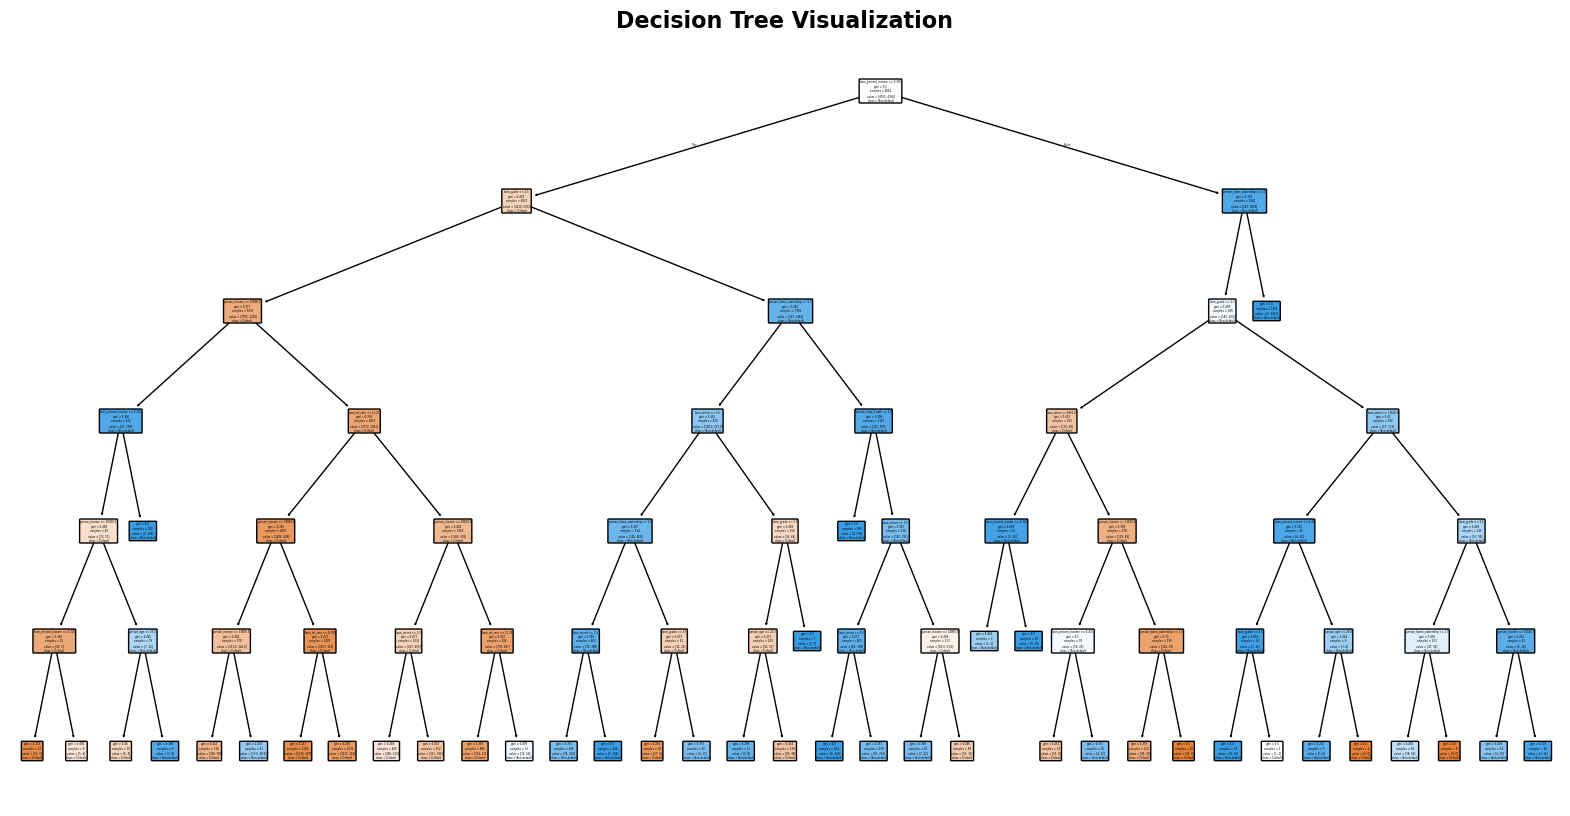

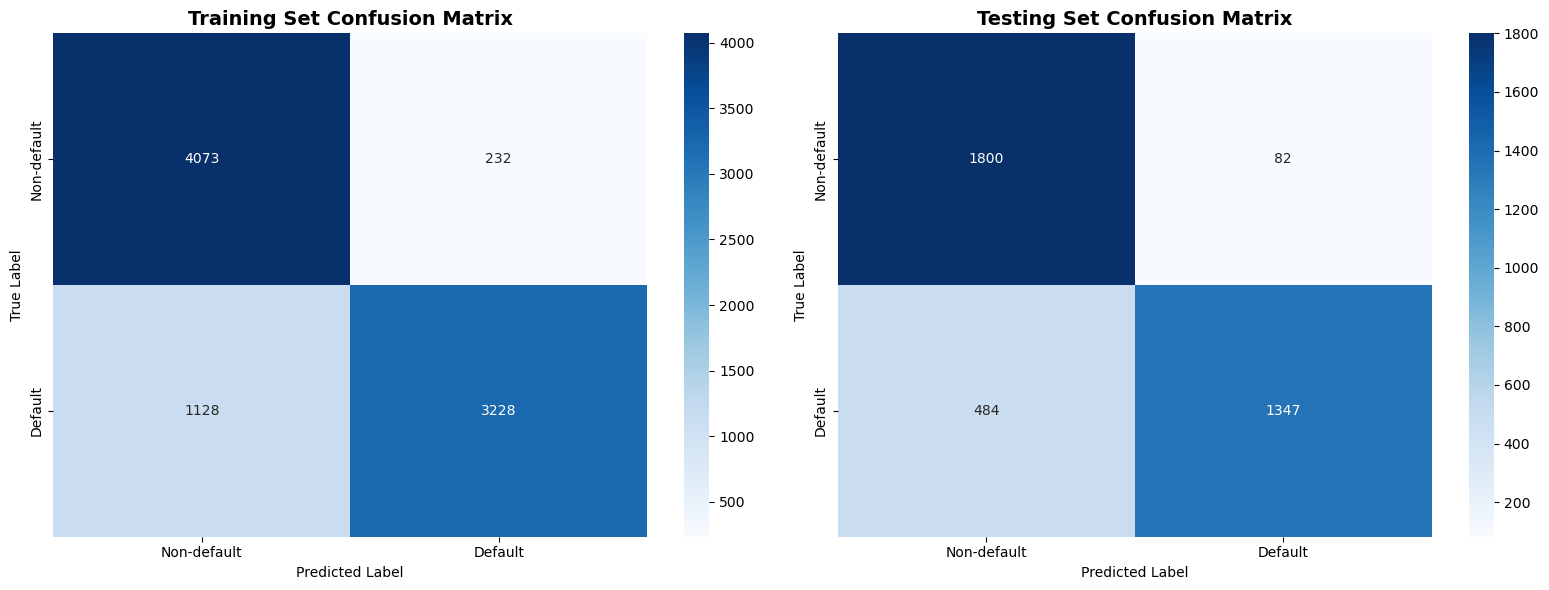

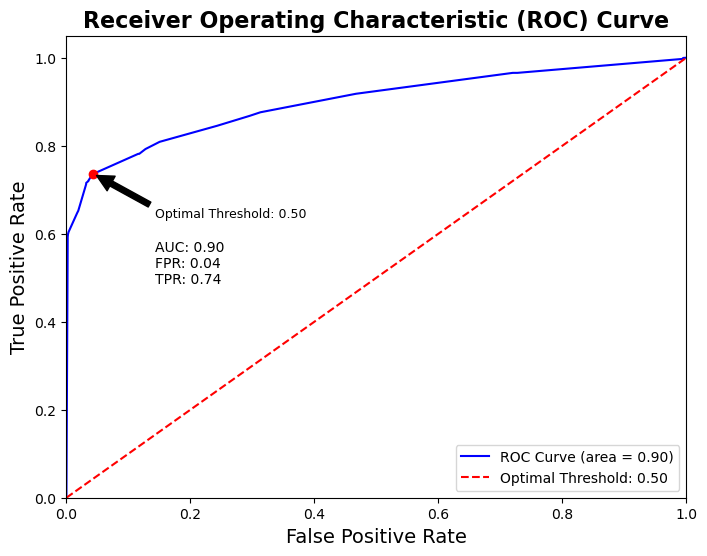


Best Parameters from Grid Search:
{'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 6}
[[[ 0.00000000e+00  0.00000000e+00]
  [ 4.05298014e-02 -4.05298018e-02]
  [ 3.91096096e-01 -3.91096094e-01]
  ...
  [-1.53107565e-01  1.53107560e-01]
  [ 0.00000000e+00  0.00000000e+00]
  [-1.36363646e-04  1.36363646e-04]]

 [[ 0.00000000e+00  0.00000000e+00]
  [ 4.39205987e-02 -4.39205974e-02]
  [ 5.78700877e-02 -5.78700846e-02]
  ...
  [ 5.20172074e-02 -5.20172083e-02]
  [ 0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00]
  [ 3.82024596e-02 -3.82024606e-02]
  [ 8.53339520e-02 -8.53339492e-02]
  ...
  [ 4.47874867e-02 -4.47874855e-02]
  [ 0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00]]

 ...

 [[ 0.00000000e+00  0.00000000e+00]
  [ 1.91499154e-02 -1.91499152e-02]
  [-1.41359861e-01  1.41359859e-01]
  ...
  [-4.29104131e-01  4.29104131e-01]
  [ 0.00000000e+00  0.00000000e+00]
  [ 1.36363646e-04

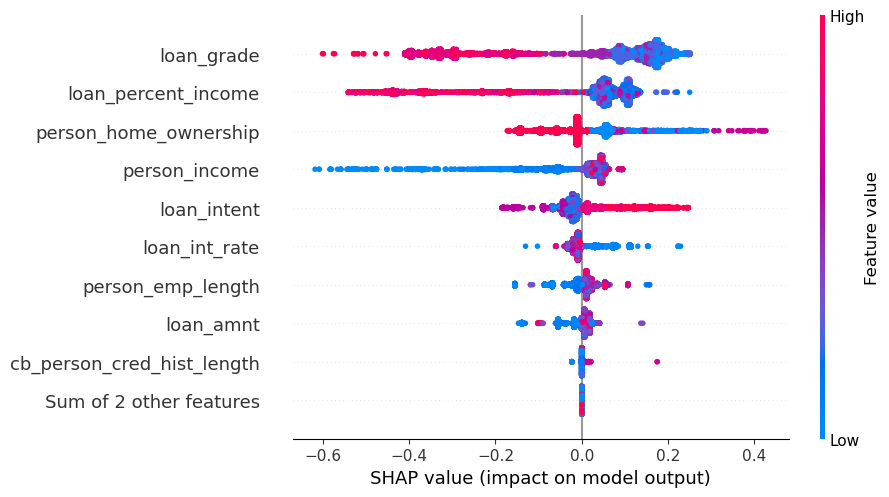

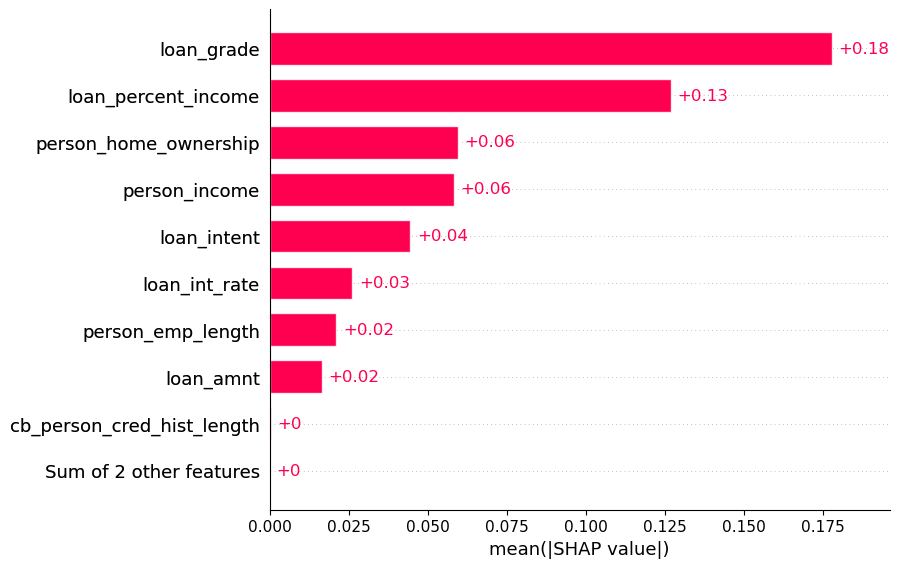

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score,f1_score,ConfusionMatrixDisplay
#from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
import shap


data = pd.read_csv('final_credit_data.csv')
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])
data['loan_status'] = 1- data['loan_status']
encoding_mapping = {}
encoding_mapping['loan_status'] = dict(zip(le.classes_, 1-le.transform(le.classes_)))

X_except_status = data[data.columns[~data.columns.isin(['loan_status'])]]
Y = data['loan_status']

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_except_status, Y)
y_resampled = pd.DataFrame(y_resampled,columns = ['loan_status'])
X_resampled = X_resampled.reset_index(drop=True)
y_resampled = y_resampled.reset_index(drop=True)

data_sampled = pd.concat([X_resampled,y_resampled],axis=1)

data_encoded = pd.DataFrame()
factor_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

for column in data_sampled.columns:
    if column in factor_columns:
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_sampled[column])
        encoding_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    else:
        data_encoded[column] = data_sampled[column]

train_indices, test_indices = train_test_split(data_encoded.index, test_size=0.3, random_state=2004)

data_encoded['train.indice'] = False
data_encoded.loc[train_indices, 'train.indice'] = True

data_train = data_encoded[data_encoded["train.indice"] == True]
data_test = data_encoded[data_encoded["train.indice"] == False]

x_train = data_train.drop(['loan_status', 'train.indice'], axis=1)
y_train = data_train['loan_status']

x_test = data_test.drop(['loan_status', 'train.indice'], axis=1)
y_test = data_test['loan_status']
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve, auc)
from sklearn.tree import plot_tree

def calculate_metrics(y_true, y_pred):
    metrics = {
        "Accuracy": f"{accuracy_score(y_true, y_pred) * 100:.2f}%",
        "Precision": f"{precision_score(y_true, y_pred) * 100:.2f}%",
        "Recall": f"{recall_score(y_true, y_pred) * 100:.2f}%",
        "F1 Score": f"{f1_score(y_true, y_pred) * 100:.2f}%",
        "ROC AUC": f"{roc_auc_score(y_true, y_pred) * 100:.2f}%"
    }
    return metrics

def my_decision_tree(x_train, y_train, x_test, y_test):
    
    dt = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {
        'max_depth': range(1,30, 5), 
        'min_samples_split': range(2, 10, 2),  
        'max_features': range(1, x_train.shape[1] + 1), 
        'min_samples_leaf': range(2, 10, 2)
    }
    dt_best = GridSearchCV(dt, param_grid=dt_param_grid, n_jobs=-1, cv=10, verbose=100)
    dt_best.fit(x_train, y_train)

    y_train_predict = dt_best.predict(x_train)  
    y_test_predict = dt_best.predict(x_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict).ravel()
    test_metrics = calculate_metrics(y_test, y_test_predict)
    train_metrics = calculate_metrics(y_train, y_train_predict)

    print("\nTraining Set Metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    
    print("\nTesting Set Metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")

    plt.figure(figsize=(20, 10))
    feature_names = x_train.columns if hasattr(x_train, 'columns') else None
    plot_tree(dt_best.best_estimator_,
              feature_names=feature_names,
              class_names=['Default','Non-default'],
              filled=True,
              rounded=True)
    plt.title('Decision Tree Visualization', fontsize=16, fontweight='bold')
    plt.savefig("my_decision_tree.png")
    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    cm_train = confusion_matrix(y_train, y_train_predict)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-default', 'Default'], 
                yticklabels=['Non-default', 'Default'], ax=axs[0])
    axs[0].set_ylabel('True Label')
    axs[0].set_xlabel('Predicted Label')
    axs[0].set_title('Training Set Confusion Matrix', fontsize=14, fontweight='bold')

    cm_test = confusion_matrix(y_test, y_test_predict)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-default', 'Default'], 
                yticklabels=['Non-default', 'Default'], ax=axs[1])
    axs[1].set_ylabel('True Label')
    axs[1].set_xlabel('Predicted Label')
    axs[1].set_title('Testing Set Confusion Matrix', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    y_prob = dt_best.predict_proba(x_test)[:, 1]  
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)  
    roc_auc = auc(fpr, tpr)  

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.05])  
    plt.xlabel('False Positive Rate', fontsize=14) 
    plt.ylabel('True Positive Rate', fontsize=14)  
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')  

    optimal_idx = np.argmax(tpr - fpr)  
    optimal_threshold = thresholds[optimal_idx]  
    optimal_fpr = fpr[optimal_idx]  
    optimal_tpr = tpr[optimal_idx] 

    plt.plot(optimal_fpr, optimal_tpr, 'ro')  
    plt.annotate(f'Optimal Threshold: {optimal_threshold:.2f}', 
                 xy=(optimal_fpr, optimal_tpr), 
                 xytext=(optimal_fpr + 0.1, optimal_tpr - 0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=9)

    plt.text(optimal_fpr + 0.1, optimal_tpr - 0.25, 
             f'AUC: {roc_auc:.2f}\nFPR: {optimal_fpr:.2f}\nTPR: {optimal_tpr:.2f}', 
             fontsize=10, ha='left', color='black')  

    plt.legend(loc="lower right", 
               labels=[f'ROC Curve (area = {roc_auc:.2f})', 
                       f'Optimal Threshold: {optimal_threshold:.2f}'])
    plt.show()

    print("\nBest Parameters from Grid Search:")
    print(dt_best.best_params_)

    return dt_best.best_params_, dt_best, y_test_predict 

best_params, best_model, y_prob = my_decision_tree(x_train, y_train, x_test, y_test)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import shap

model = DecisionTreeClassifier(max_depth=6, max_features=7, min_samples_leaf=2, min_samples_split=6)
model.fit(x_train, y_train)
explainer = shap.TreeExplainer(model, x_train)

shap_values = explainer.shap_values(x_train)
print(shap_values)   
shap_obj = explainer(x_train)
print(shap_obj.values)


shap.plots.beeswarm(shap_obj[:,:,0], show=True)   
shap.plots.bar(shap_obj[:,:,0])



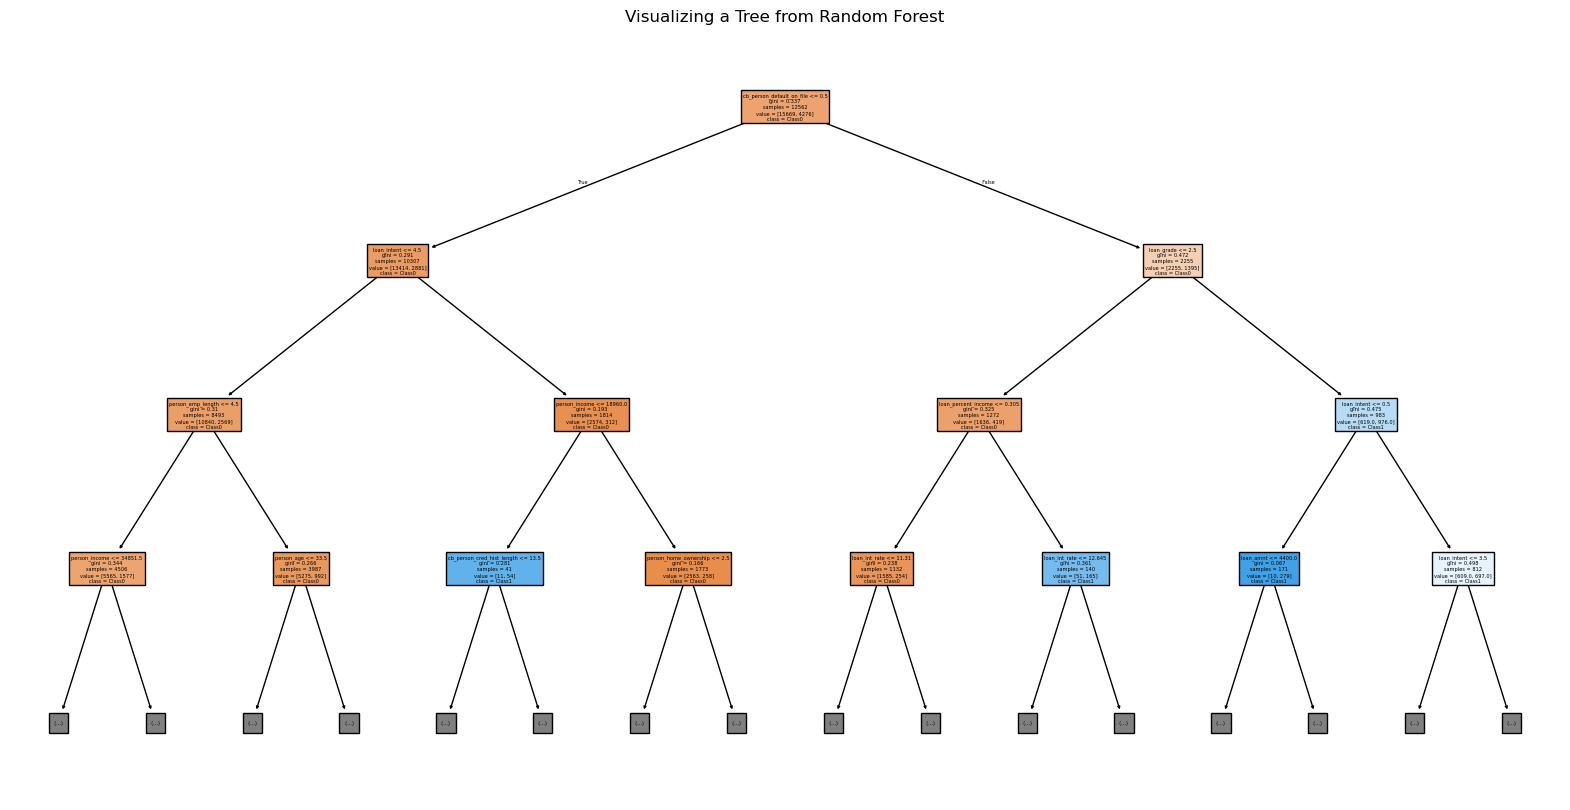

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6693
           1       0.96      0.69      0.81      1855

    accuracy                           0.93      8548
   macro avg       0.94      0.84      0.88      8548
weighted avg       0.93      0.93      0.92      8548

                            importance
loan_percent_income           0.219025
person_income                 0.147433
loan_int_rate                 0.125646
loan_grade                    0.105780
person_home_ownership         0.096738
loan_amnt                     0.076124
loan_intent                   0.075226
person_emp_length             0.064197
person_age                    0.043459
cb_person_cred_hist_length    0.035371
cb_person_default_on_file     0.011001
x_train shape: (8661, 11)
x_test shape: (3713, 11)
y_train shape: (8661,)
y_test shape: (3713,)
Fitting 10 folds for each of 264 candidates, totalling 2640 fits
[CV 3/10; 1/264] START max_de

/Users/xinyueke/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Training Set Metrics:
Accuracy: 84.78%
Precision: 95.24%
Recall: 73.42%
F1 Score: 82.91%
ROC AUC: 84.85%

Testing Set Metrics:
Accuracy: 84.84%
Precision: 95.22%
Recall: 72.91%
F1 Score: 82.59%
ROC AUC: 84.68%


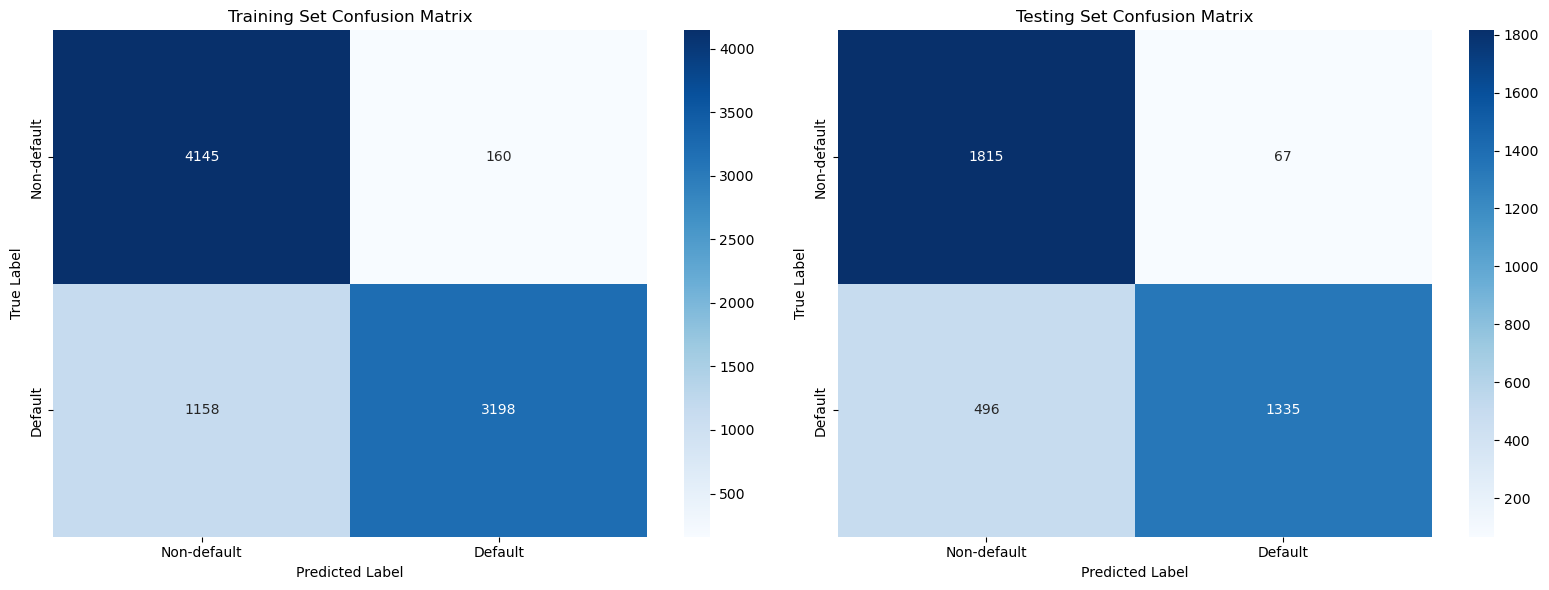

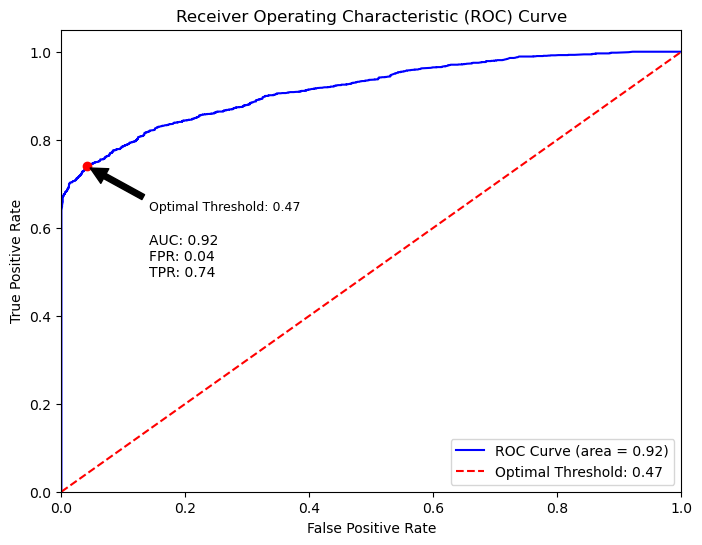


Best Parameters from Grid Search:
{'max_depth': 6, 'max_features': 11, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
[[[ 0.          0.        ]
  [ 0.03712321 -0.03712322]
  [ 0.          0.        ]
  ...
  [-0.45661406  0.45661406]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [-0.00344486  0.00344486]
  [ 0.          0.        ]
  ...
  [ 0.10878964 -0.10878964]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.03712321 -0.03712322]
  [ 0.          0.        ]
  ...
  [ 0.09892704 -0.09892704]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 ...

 [[ 0.          0.        ]
  [-0.00414943  0.00414943]
  [ 0.          0.        ]
  ...
  [-0.45661406  0.45661406]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [-0.03170829  0.03170829]
  [ 0.          0.        ]
  ...
  [-0.18513561  0.18513562]
  [ 0.          0.        ]
  [ 

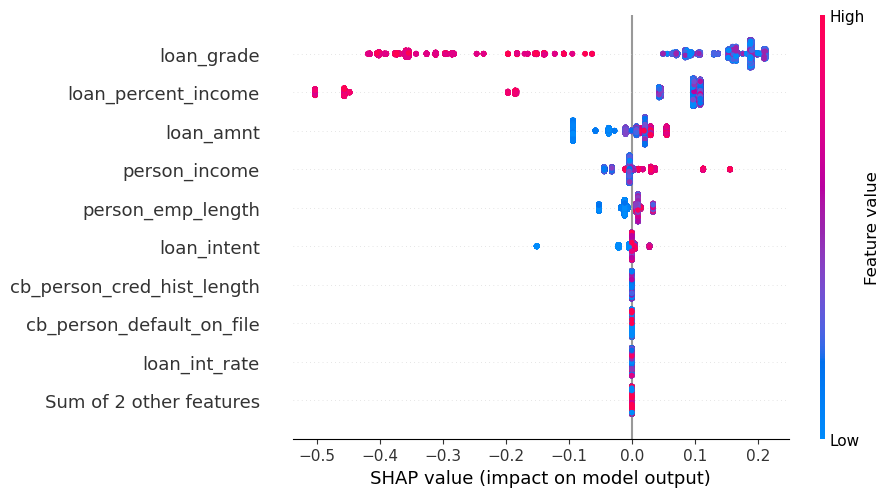

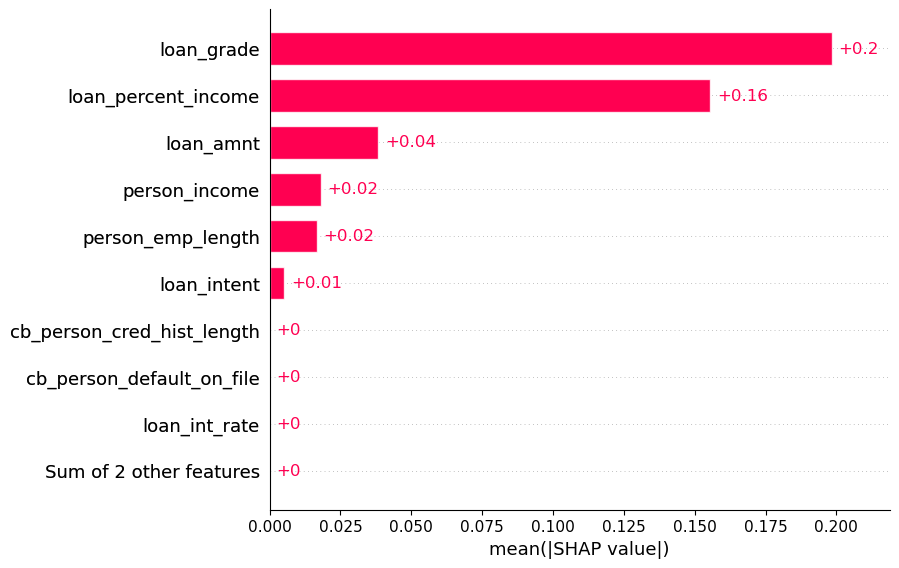

In [9]:
# Random Forest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import pandas as pd


# Encode categorical variables
label_encoders = {}
for column in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data into features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2004)

# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=2004)
classifier.fit(X_train, y_train)

# Select one tree from the forest
tree = classifier.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
# Convert X.columns to a list explicitly
plot_tree(tree, filled=True, feature_names=list(X.columns), class_names=['Class0', 'Class1', 'Class2'], max_depth=3)
plt.title('Visualizing a Tree from Random Forest')
plt.show()

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))

# To see the feature importance
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score,f1_score,ConfusionMatrixDisplay
#from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
import shap


data = pd.read_csv('final_credit_data.csv')
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])
data['loan_status'] = 1- data['loan_status']
encoding_mapping = {}
encoding_mapping['loan_status'] = dict(zip(le.classes_, 1-le.transform(le.classes_)))

X_except_status = data[data.columns[~data.columns.isin(['loan_status'])]]
Y = data['loan_status']

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_except_status, Y)
y_resampled = pd.DataFrame(y_resampled,columns = ['loan_status'])
X_resampled = X_resampled.reset_index(drop=True)
y_resampled = y_resampled.reset_index(drop=True)

data_sampled = pd.concat([X_resampled,y_resampled],axis=1)

data_encoded = pd.DataFrame()
factor_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

for column in data_sampled.columns:
    if column in factor_columns:
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_sampled[column])
        encoding_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    else:
        data_encoded[column] = data_sampled[column]

train_indices, test_indices = train_test_split(data_encoded.index, test_size=0.3, random_state=2004)

data_encoded['train.indice'] = False
data_encoded.loc[train_indices, 'train.indice'] = True

data_train = data_encoded[data_encoded["train.indice"] == True]
data_test = data_encoded[data_encoded["train.indice"] == False]

x_train = data_train.drop(['loan_status', 'train.indice'], axis=1)
y_train = data_train['loan_status']

x_test = data_test.drop(['loan_status', 'train.indice'], axis=1)
y_test = data_test['loan_status']
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve, auc)

def calculate_metrics(y_true, y_pred):
    metrics = {
        "Accuracy": f"{accuracy_score(y_true, y_pred) * 100:.2f}%",
        "Precision": f"{precision_score(y_true, y_pred) * 100:.2f}%",
        "Recall": f"{recall_score(y_true, y_pred) * 100:.2f}%",
        "F1 Score": f"{f1_score(y_true, y_pred) * 100:.2f}%",
        "ROC AUC": f"{roc_auc_score(y_true, y_pred) * 100:.2f}%"
    }
    return metrics

def my_random_forest(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(random_state=0)
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': range(1, 10, 5),
        'min_samples_split': range(2, 6, 2),
        'max_features': range(1, x_train.shape[1] + 1),
        'min_samples_leaf': range(2, 6, 2)
    }
    rf_best = GridSearchCV(rf, param_grid=rf_param_grid, n_jobs=-1, cv=10, verbose=100)
    rf_best.fit(x_train, y_train)

    y_train_predict = rf_best.predict(x_train)
    y_test_predict = rf_best.predict(x_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict).ravel()
    test_metrics = calculate_metrics(y_test, y_test_predict)
    train_metrics = calculate_metrics(y_train, y_train_predict)

    print("\nTraining Set Metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    
    print("\nTesting Set Metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    cm_train = confusion_matrix(y_train, y_train_predict)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-default', 'Default'], 
                yticklabels=['Non-default', 'Default'], ax=axs[0])
    axs[0].set_ylabel('True Label')
    axs[0].set_xlabel('Predicted Label')
    axs[0].set_title('Training Set Confusion Matrix')

    cm_test = confusion_matrix(y_test, y_test_predict)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-default', 'Default'], 
                yticklabels=['Non-default', 'Default'], ax=axs[1])
    axs[1].set_ylabel('True Label')
    axs[1].set_xlabel('Predicted Label')
    axs[1].set_title('Testing Set Confusion Matrix')

    plt.tight_layout()
    plt.show()

    y_prob = rf_best.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    optimal_fpr = fpr[optimal_idx]
    optimal_tpr = tpr[optimal_idx]

    plt.plot(optimal_fpr, optimal_tpr, 'ro')
    plt.annotate(f'Optimal Threshold: {optimal_threshold:.2f}', 
                 xy=(optimal_fpr, optimal_tpr), 
                 xytext=(optimal_fpr + 0.1, optimal_tpr - 0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=9)

    plt.text(optimal_fpr + 0.1, optimal_tpr - 0.25, 
             f'AUC: {roc_auc:.2f}\nFPR: {optimal_fpr:.2f}\nTPR: {optimal_tpr:.2f}', 
             fontsize=10, ha='left', color='black')

    plt.legend(loc="lower right", 
               labels=[f'ROC Curve (area = {roc_auc:.2f})', 
                       f'Optimal Threshold: {optimal_threshold:.2f}'])
    plt.show()

    print("\nBest Parameters from Grid Search:")
    print(rf_best.best_params_)

    return rf_best.best_params_, rf_best, y_test_predict

best_params, best_model, y_prob = my_random_forest(x_train, y_train, x_test, y_test)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import shap

model = DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2)
model.fit(x_train, y_train)
explainer = shap.TreeExplainer(model, x_train)

shap_values = explainer.shap_values(x_train)
print(shap_values)   
shap_obj = explainer(x_train)
print(shap_obj.values)


shap.plots.beeswarm(shap_obj[:,:,0], show=True)   
shap.plots.bar(shap_obj[:,:,0])


{'loan_status': {'Default': 1, 'Non-default': 0}, 'person_home_ownership': {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}, 'loan_intent': {'DEBT': 0, 'EDU': 1, 'HOMEI': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}, 'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}, 'cb_person_default_on_file': {'N': 0, 'Y': 1}}
Best params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'reg_lambda': 0.4}
Training Set Metrics:
Metric       Accuracy Precision  Recall F1 Score
True label:0     None    91.57%  98.19%   94.77%
True label:1     None    98.07%  91.07%   94.44%
Overall        94.61%    94.82%  94.63%   94.60%

Testing Set Metrics:
Metric       Accuracy Precision  Recall F1 Score
True label:0     None    84.04%  92.08%   87.88%
True label:1     None    90.98%  82.03%   86.27%
Overall        87.13%    87.51%  87.06%   87.08%


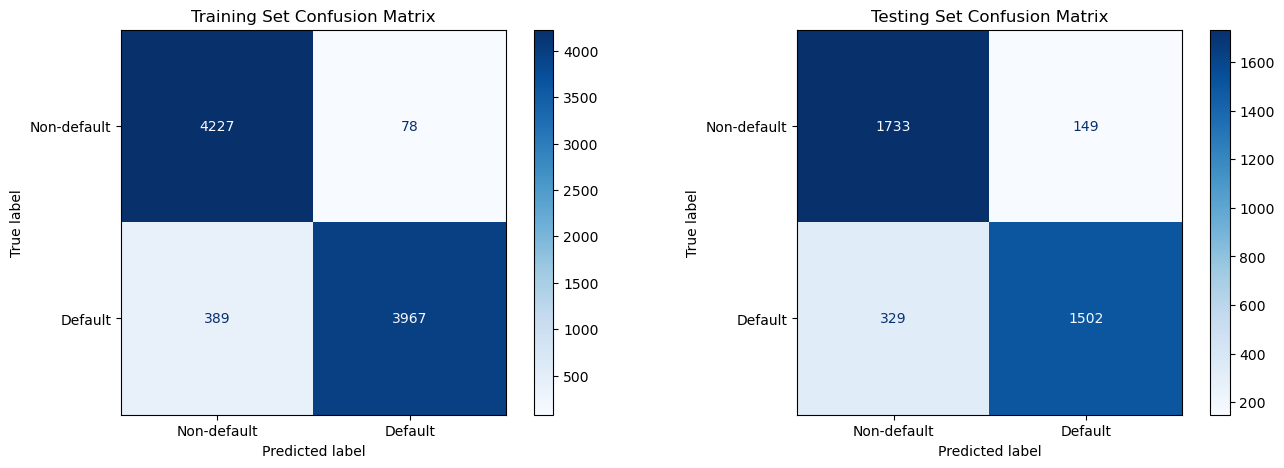

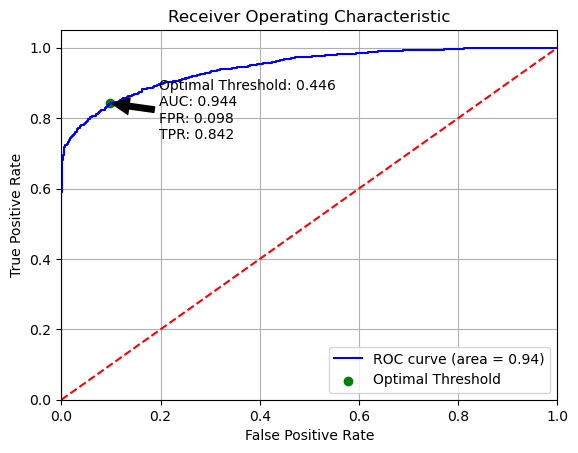

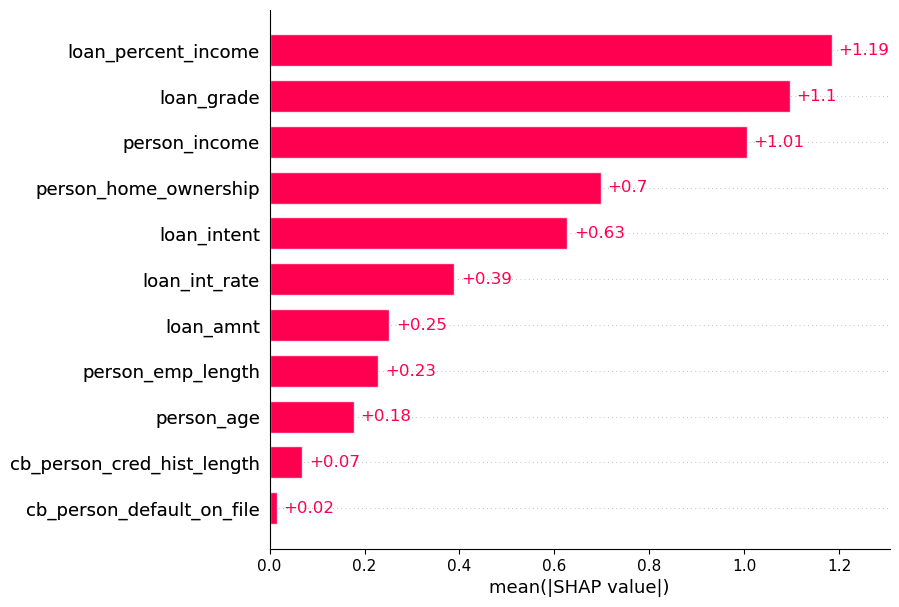

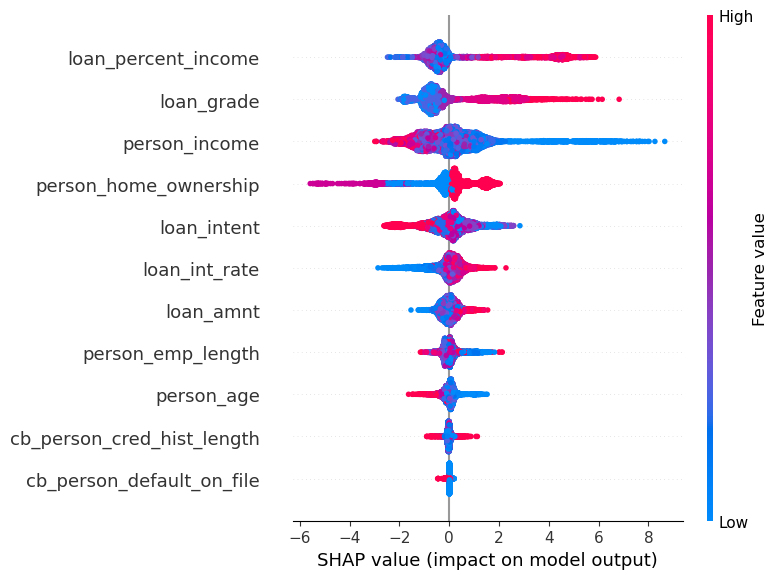

In [10]:
# XGBOOST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score,f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import shap

data = pd.read_csv('./final_credit_data.csv')

# label encoding: loan_status
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])
data['loan_status'] = 1- data['loan_status'] # 0:non-default; 1:default
encoding_mapping = {}
encoding_mapping['loan_status'] = dict(zip(le.classes_, 1-le.transform(le.classes_)))

X_except_status = data[data.columns[~data.columns.isin(['loan_status'])]]
Y = data['loan_status']

# undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_except_status, Y)
y_resampled = pd.DataFrame(y_resampled,columns = ['loan_status'])
X_resampled = X_resampled.reset_index(drop=True)
y_resampled = y_resampled.reset_index(drop=True)
data_sampled = pd.concat([X_resampled,y_resampled],axis=1)

# label encoding: x variable
data_encoded = pd.DataFrame()
factor_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
for column in data_sampled.columns:
    if column in factor_columns:
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_sampled[column])
        encoding_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    else:
        data_encoded[column] = data_sampled[column]
print(encoding_mapping) # label mapping

# split train/test dataset
train_indices, test_indices = train_test_split(data_encoded.index, test_size=0.3, random_state=2004)
data_encoded['train.indice'] = False
data_encoded.loc[train_indices, 'train.indice'] = True

data_train = data_encoded[data_encoded["train.indice"] == True]
data_test = data_encoded[data_encoded["train.indice"] == False]

x_train = data_train.drop(['loan_status', 'train.indice'], axis=1)
y_train = data_train['loan_status']

x_test = data_test.drop(['loan_status', 'train.indice'], axis=1)
y_test = data_test['loan_status']
#print(x_train.shape)
#print(x_test.shape)

# xgbclassifier model
model = XGBClassifier(eval_metric='logloss', random_state=42)
#model.fit(x_train, y_train)
#y_pred = model.predict(x_test)
#train_accuracy = accuracy_score(y_train, model.predict(x_train))
#test_accuracy = accuracy_score(y_test, y_pred)
#print(train_accuracy)
#print(test_accuracy)
#print(confusion_matrix(y_test, y_pred))

# grid search
param_grid = {
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200]
    ,'reg_lambda': [0.2,0.4,0.6,0.8,1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(x_train, y_train)

# best parameters
best_params = grid_search.best_params_
print("Best params:", best_params)

# best model
best_model = grid_search.best_estimator_

# model predict
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)
y_train_prob = best_model.predict_proba(x_train)[:, 1]
y_test_prob = best_model.predict_proba(x_test)[:, 1]

# model evaluation
def evaluate_model_to_dataframe(y_true, y_pred, y_scores, dataset_name=''):
    metrics = {
        'Metric': ['Accuracy','Precision', 'Recall', 'F1 Score'],
        'True label:0': [],
        'True label:1': [],
        'Overall': []
    }
    # for each label
    for label in np.unique(y_true):
        precision = precision_score(y_true, y_pred, pos_label=label)
        recall = recall_score(y_true, y_pred, pos_label=label)
        f1 = f1_score(y_true, y_pred, pos_label=label)

        metrics['True label:' + str(label)].append(None)
        metrics['True label:' + str(label)].append(f'{precision:.2%}')
        metrics['True label:' + str(label)].append(f'{recall:.2%}')
        metrics['True label:' + str(label)].append(f'{f1 :.2%}')

    # for overall
    overall_accuracy = accuracy_score(y_true, y_pred)
    overall_precision = precision_score(y_true, y_pred, average='macro')
    overall_recall = recall_score(y_true, y_pred, average='macro')
    overall_f1 = f1_score(y_true, y_pred, average='macro')

    metrics['Overall'].append(f'{overall_accuracy:.2%}')
    metrics['Overall'].append(f'{overall_precision:.2%}')
    metrics['Overall'].append(f'{overall_recall:.2%}')
    metrics['Overall'].append(f'{overall_f1:.2%}')
    
    metrics_df = pd.DataFrame(metrics)
    metrics_df.set_index('Metric', inplace=True)
    return metrics_df

train_metrics_df = evaluate_model_to_dataframe(y_train, y_train_pred, y_train_prob, dataset_name='Training Set')
test_metrics_df = evaluate_model_to_dataframe(y_test, y_test_pred, y_test_prob, dataset_name='Testing Set')

# print evaluation results
print("Training Set Metrics:")
print(train_metrics_df.T)
print("\nTesting Set Metrics:")
print(test_metrics_df.T)

# confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Non-default', 'Default']).plot(ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title('Training Set Confusion Matrix')

ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Non-default', 'Default']).plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title('Testing Set Confusion Matrix')
plt.show()

# roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc = roc_auc_score(y_test, y_test_prob)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.scatter(optimal_fpr, optimal_tpr, color='green', marker='o', label='Optimal Threshold')

# add annotate
plt.annotate(f'Optimal Threshold: {optimal_threshold:.3f}\n'
             f'AUC: {auc:.3f}\n'
             f'FPR: {optimal_fpr:.3f}\n'
             f'TPR: {optimal_tpr:.3f}',
             xy=(optimal_fpr, optimal_tpr), 
             xytext=(optimal_fpr + 0.1, optimal_tpr - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# feature importance
# shap value
explainer = shap.Explainer(best_model)
shap_values = explainer(x_train)
feature_names = x_train.columns

# Plot Feature Importance (Mean Absolute SHAP Values)
plt.figure(figsize=(10, 4))
shap.plots.bar(shap_values, max_display=12)


# plot Distribution of SHAP Values
plt.figure(figsize=(4, 4))
shap.summary_plot(shap_values, x_train, feature_names=feature_names, show=False)
plt.show()





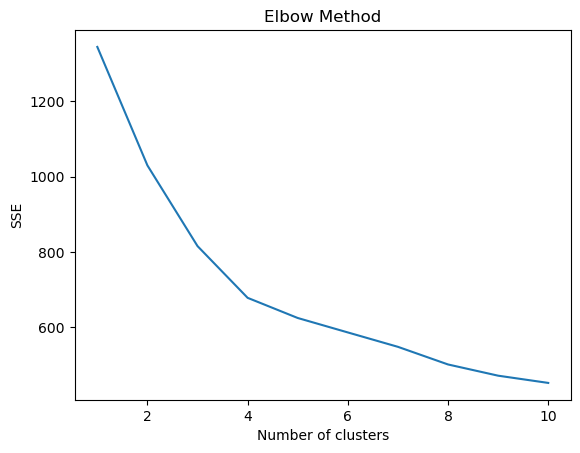

   person_age  person_income  person_emp_length  loan_int_rate  \
1   25.803868   40862.354352           3.907930      11.290677   
2   26.031236   63275.696601           4.065687      14.937556   
3   41.295008   70953.182300           5.895613      12.103843   
4   26.040846   66686.769025           4.962315       8.776997   

   loan_percent_income  cb_person_cred_hist_length  loan_status  count  
1             0.368360                    4.635203     0.789555   2585  
2             0.164614                    4.723932     0.622876   4354  
3             0.186475                   14.729955     0.470499   1322  
4             0.128104                    4.639922     0.197423   4113  
   person_age  person_income  person_emp_length  loan_int_rate  \
1   25.803868   40862.354352           3.907930      11.290677   
2   26.031236   63275.696601           4.065687      14.937556   
3   41.295008   70953.182300           5.895613      12.103843   
4   26.040846   66686.769025           4

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from collections import Counter

data = pd.read_csv('./final_credit_data.csv')

# label encoding: loan_status
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])
data['loan_status'] = 1- data['loan_status'] # 0:non-default; 1:default

# undersampling
X_except_status = data[data.columns[~data.columns.isin(['loan_status'])]]
Y = data['loan_status']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_except_status, Y)
y_resampled = pd.DataFrame(y_resampled,columns = ['loan_status'])
X_resampled = X_resampled.reset_index(drop=True)
y_resampled = y_resampled.reset_index(drop=True)
data_resampled  = pd.concat([X_resampled,y_resampled],axis = 1)

# exclude factor variables
factor_columns_x = ['person_home_ownership','loan_intent','loan_grade','loan_amnt','cb_person_default_on_file']
X_except_status = X_resampled[X_resampled.columns[~X_resampled.columns.isin(factor_columns_x)]]

# Min-Max normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X_except_status)

#elbow method for selecting k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# final clustering model: k = 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# predict clustering labels
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
df_centre = pd.DataFrame(centers,columns = X_except_status.columns)  # center: scaled values 

# center: unscaled, original data
data_result = pd.concat([X_except_status,pd.DataFrame(y_kmeans,columns = ['cluster']),y_resampled],axis = 1)
center_result = data_result.groupby(['cluster']).mean().sort_values(by='loan_status', ascending=False)
#print(center_result)

# calculate the count of each cluster
count_dict = Counter(y_kmeans)
count = pd.DataFrame.from_dict(count_dict, orient='index', columns=['count'])

# merge
center_result = pd.concat([center_result,count],axis = 1).reset_index(drop = True)
center_result.index = center_result.index + 1
print(center_result)
print(center_result)

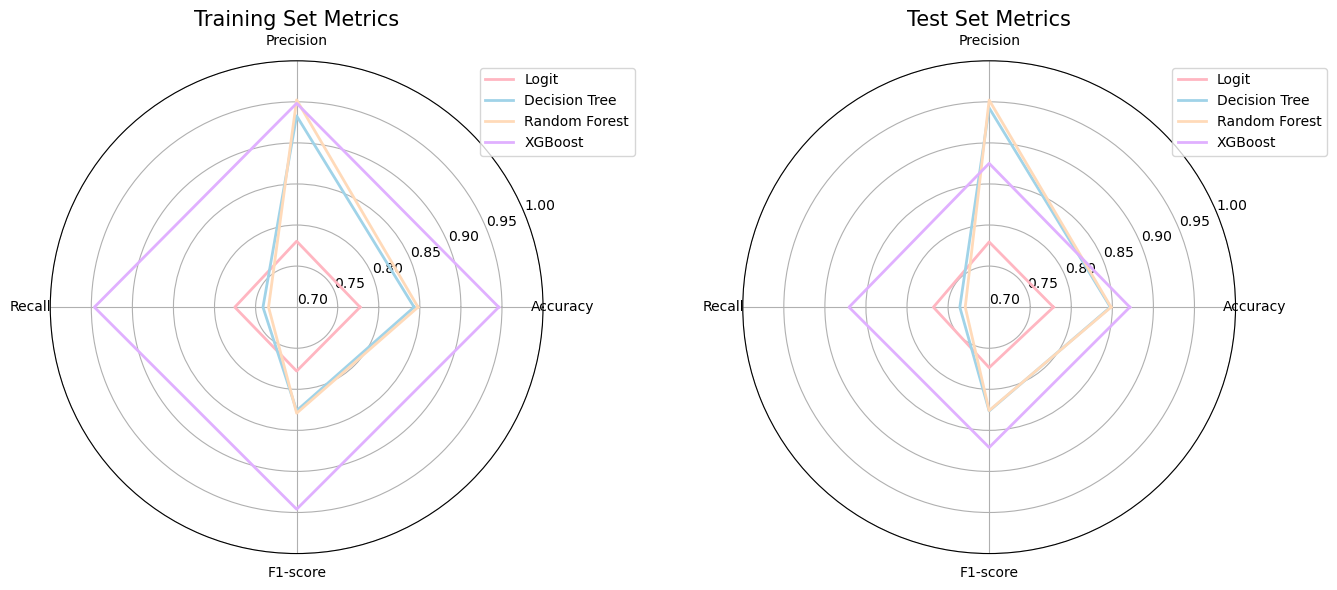

In [12]:
### model comparison
import numpy as np
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
num_vars = len(labels)

train_values = [
    [0.7772, 0.7803, 0.7753, 0.7778],  # Logit
    [0.8430, 0.9329, 0.7410, 0.8260],  # Decision Tree
    [0.8478, 0.9524, 0.7342, 0.8291],  # Random Forest
    [0.9461, 0.9482, 0.9463, 0.9460]   # XGBoost
]

test_values = [
    [0.7783, 0.7794, 0.7679, 0.7736],  # Logit
    [0.8476, 0.9426, 0.7357, 0.8264],  # Decision Tree
    [0.8484, 0.9522, 0.7291, 0.8259],  # Random Forest
    [0.8713, 0.8751, 0.8706, 0.8708]   # XGBoost
]

model_names = ['Logit', 'Decision Tree', 'Random Forest', 'XGBoost']
colors = ['#FFB6C1', '#A0D3E8', '#FFDAB9', '#E0B0FF']  

def create_radar_chart(values, title, ax, color):
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = np.array(values).flatten()
    values = np.concatenate((values, [values[0]])) 
    angles += angles[:1]  

    ax.plot(angles, values, color=color, linewidth=2)  

    ax.set_yticks(np.arange(0.7, 1.0, 0.05))  
    ax.set_yticklabels([f'{tick:.2f}' for tick in np.arange(0.7, 1.0, 0.05)])  
    ax.set_xticks(angles[:-1])  
    ax.set_xticklabels(labels)  
    ax.set_title(title, size=15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw=dict(polar=True))

for i, model in enumerate(model_names):
    create_radar_chart(train_values[i], model, ax1, colors[i])

ax1.legend(model_names, loc='upper right', bbox_to_anchor=(1.2, 1))
ax1.set_title('Training Set Metrics', size=15)

for i, model in enumerate(model_names):
    create_radar_chart(test_values[i], model, ax2, colors[i])

ax2.legend(model_names, loc='upper right', bbox_to_anchor=(1.2, 1))
ax2.set_title('Test Set Metrics', size=15)

plt.tight_layout()
plt.show()